# **Cryptocurrency Market  Data Analysis **bold text**






# Problem statement:

In recent times, the cryptocurrency market has shown significant fluctuations and rapid growth in various digital assets. This analysis aims to identify which cryptocurrencies have experienced the highest price increases recently and evaluate their potential as investment options.

By analyzing key metrics such as daily price changes, market capitalization, 24-hour trading volume, and circulating versus total supply, we aim to determine which cryptocurrencies demonstrate strong performance and sustainability.

The ultimate goal is to provide data-driven insights for informed investment decisions based on the most promising and actively traded cryptocurrencies

Columns:
Name: The name of the cryptocurrency (e.g., Bitcoin, Ethereum).

Symbol: The ticker symbol (e.g., BTC, ETH).

Price (USD): The current price of the coin in US dollars.

Market Cap (USD): Total market capitalization, calculated as Price × Circulating Supply.

Volume (24h, USD): The trading volume in the last 24 hours in USD.

Percent Change 1h: Price percentage change in the last 1 hour.

Percent Change 24h: Price percentage change in the last 24 hours.

Percent Change 7d: Price percentage change in the last 7 days.

Circulating Supply: Number of coins that are actively circulating in the market.

Total Supply: Total coins currently in existence.

Max Supply: Maximum number of coins that can ever exist (if applicable). This is missing (NaN) for some coins.

Rank: Market rank based on market capitalization.

Last Updated: Timestamp of the last data update.

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

In [ ]:
df = pd.read_csv('coinmarket.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1000 non-null   object 
 1   Symbol              1000 non-null   object 
 2   Price (USD)         1000 non-null   float64
 3   Market Cap (USD)    1000 non-null   float64
 4   Volume (24h, USD)   1000 non-null   float64
 5   Percent Change 1h   1000 non-null   float64
 6   Percent Change 24h  1000 non-null   float64
 7   Percent Change 7d   1000 non-null   float64
 8   Circulating Supply  1000 non-null   float64
 9   Total Supply        1000 non-null   float64
 10  Max Supply          615 non-null    float64
 11  Rank                1000 non-null   int64  
 12  Last Updated        1000 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 101.7+ KB


In [ ]:
df.head()

,Name,Symbol,Price (USD),Market Cap (USD),"Volume (24h, USD)",Percent Change 1h,Percent Change 24h,Percent Change 7d,Circulating Supply,Total Supply,Max Supply,Rank,Last Updated
0,Bitcoin,BTC,107900.356521,2.145454e+12,5.109780e+10,0.085021,1.145346,3.020727,1.988366e+07,1.988366e+07,2.100000e+07,1,2025-06-26T08:01:00.000Z
1,Ethereum,ETH,2492.488495,3.008889e+11,1.873771e+10,0.192818,1.892354,-1.144752,1.207183e+08,1.207183e+08,NaN,2,2025-06-26T08:01:00.000Z
2,Tether USDt,USDT,1.000425,1.567581e+11,7.150506e+10,-0.000532,-0.008448,0.021298,1.566915e+11,1.598262e+11,NaN,3,2025-06-26T08:00:00.000Z
3,XRP,XRP,2.191389,1.293041e+11,2.640687e+09,0.159057,0.219334,1.590251,5.900555e+10,9.998599e+10,1.000000e+11,4,2025-06-26T08:01:00.000Z
4,BNB,BNB,647.434397,9.121424e+10,1.509951e+09,0.129658,0.315692,0.430374,1.408857e+08,1.408857e+08,NaN,5,2025-06-26T08:00:00.000Z


In [ ]:
df.describe()

,Price (USD),Market Cap (USD),"Volume (24h, USD)",Percent Change 1h,Percent Change 24h,Percent Change 7d,Circulating Supply,Total Supply,Max Supply,Rank
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,6.150000e+02,1000.000000
mean,1.378389e+02,3.341311e+09,2.145933e+08,0.353430,-0.561641,-0.879897,5.768624e+17,5.769205e+17,2.133713e+13,500.500000
std,3.429979e+03,6.891603e+10,2.930742e+09,1.861983,9.031629,19.021395,1.822943e+19,1.822943e+19,1.400308e+14,288.819436
min,3.521403e-14,1.198439e+07,0.000000e+00,-11.613639,-68.503000,-76.422377,1.260412e+04,1.260412e+04,1.000000e+05,1.000000
25%,2.074698e-02,2.261379e+07,1.046291e+06,-0.038972,-2.591214,-6.705844,1.477849e+08,2.545596e+08,4.450000e+08,250.750000
50%,1.067394e-01,5.197357e+07,5.285165e+06,0.226983,-0.870010,-1.855520,7.253517e+08,1.000000e+09,1.000000e+09,500.500000
75%,6.770855e-01,1.456899e+08,1.683030e+07,0.703375,0.374475,1.492227,2.195964e+09,6.063291e+09,9.330000e+09,750.250000
max,1.079004e+05,2.145454e+12,7.150506e+10,26.302923,211.223750,211.916743,5.764657e+20,5.764657e+20,2.100000e+15,1000.000000


# **Data Cleaning**

In [ ]:
pd.DataFrame({"count":df.isnull().sum(),"missing_values":round(df.isnull().sum()/len(df)*100,2)})

,count,missing_values
Name,0,0.00000000
Symbol,0,0.00000000
Price (USD),0,0.00000000
Market Cap (USD),0,0.00000000
"Volume (24h, USD)",0,0.00000000
Percent Change 1h,0,0.00000000
Percent Change 24h,0,0.00000000
Percent Change 7d,0,0.00000000
Circulating Supply,0,0.00000000
Total Supply,0,0.00000000


# **detecting outliers**

In [ ]:
df['Max Supply']= df['Max Supply'].median()
df['Max Supply'] = df['Max Supply'].fillna(df['Max Supply'])

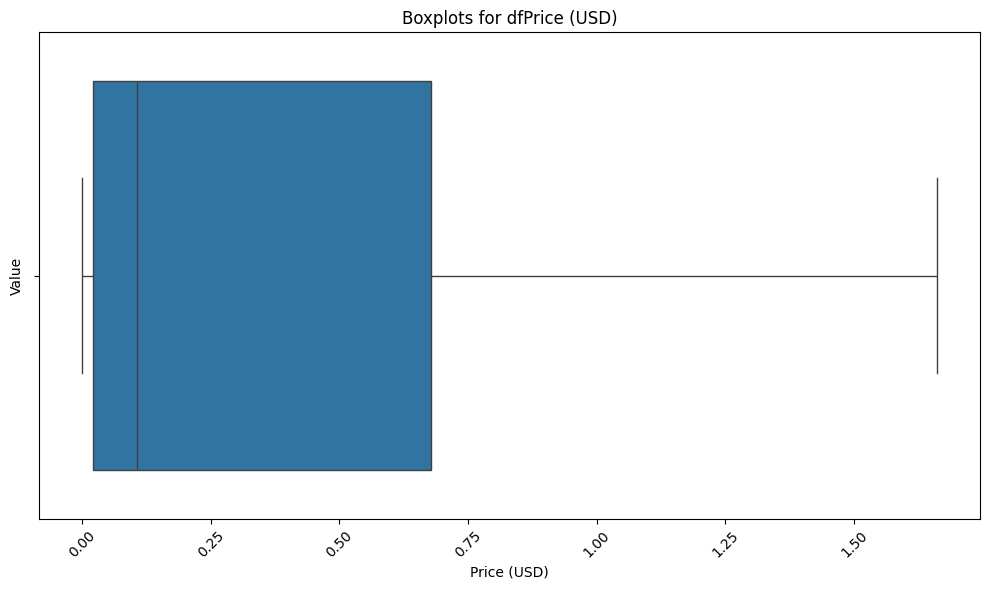

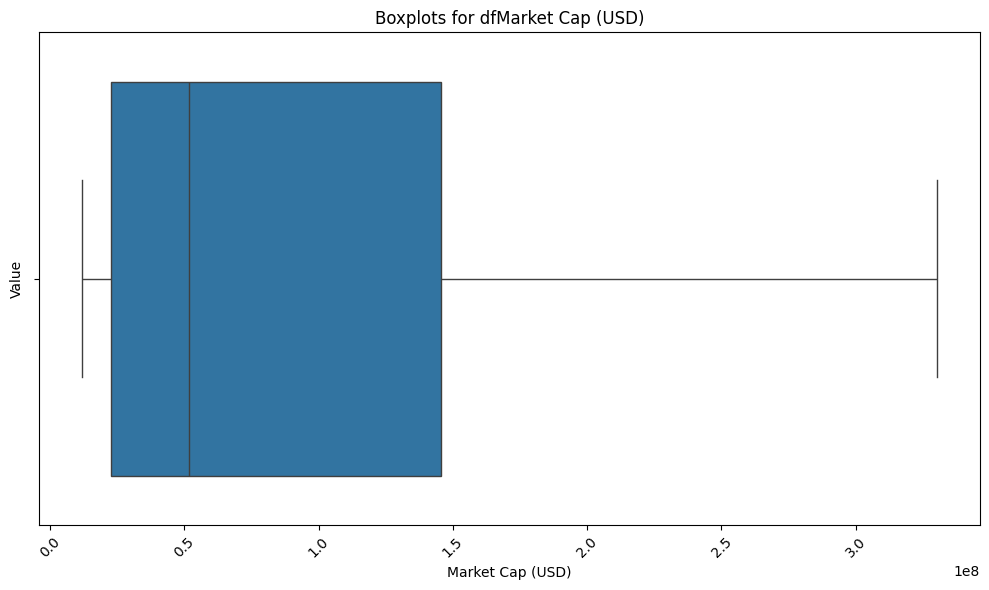

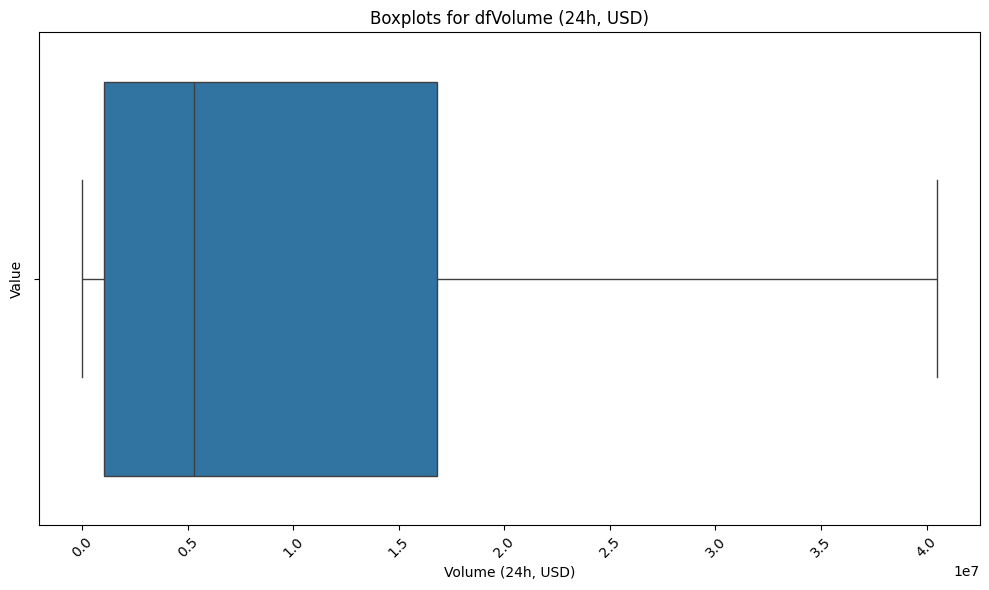

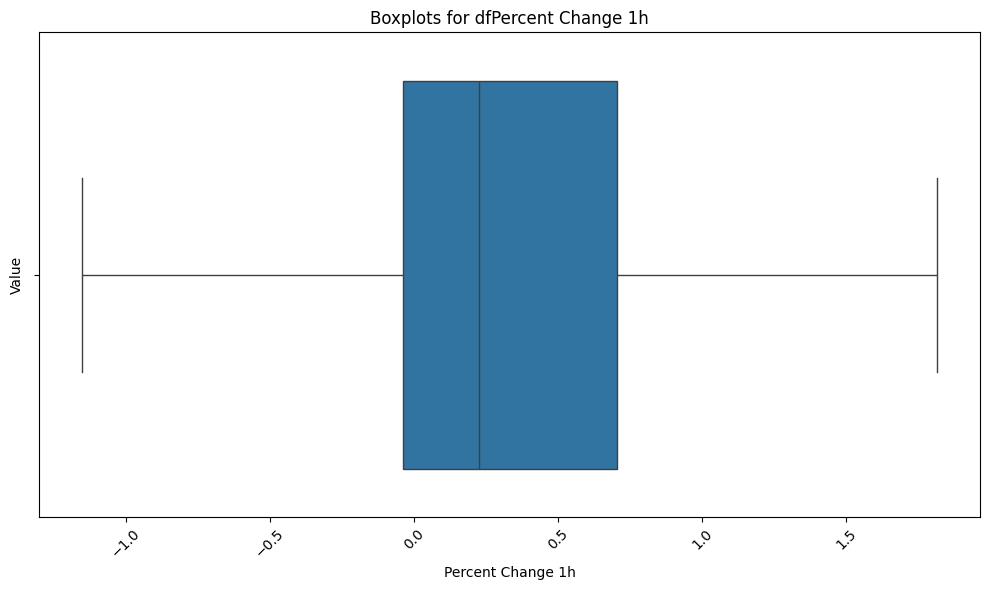

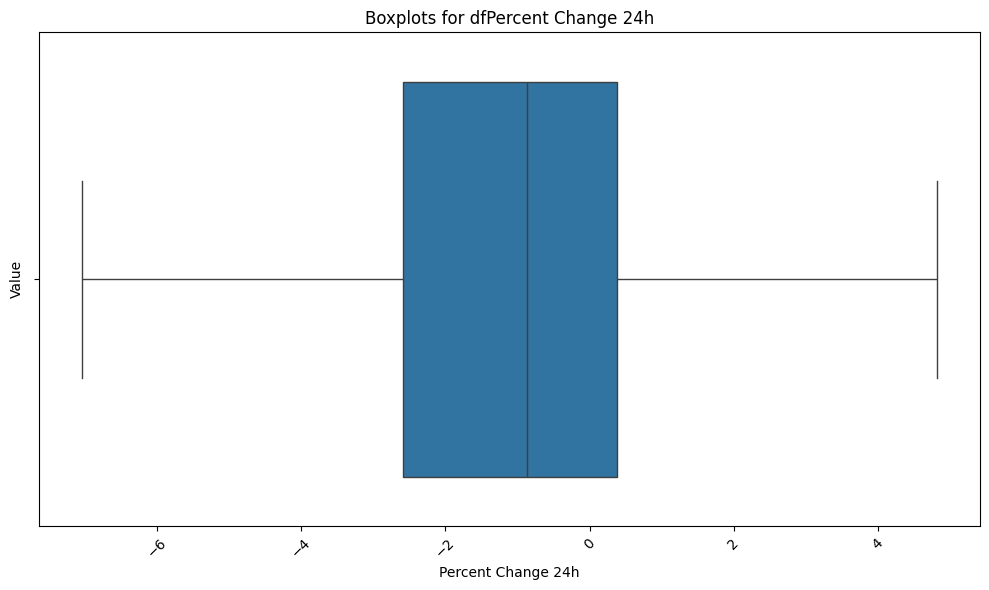

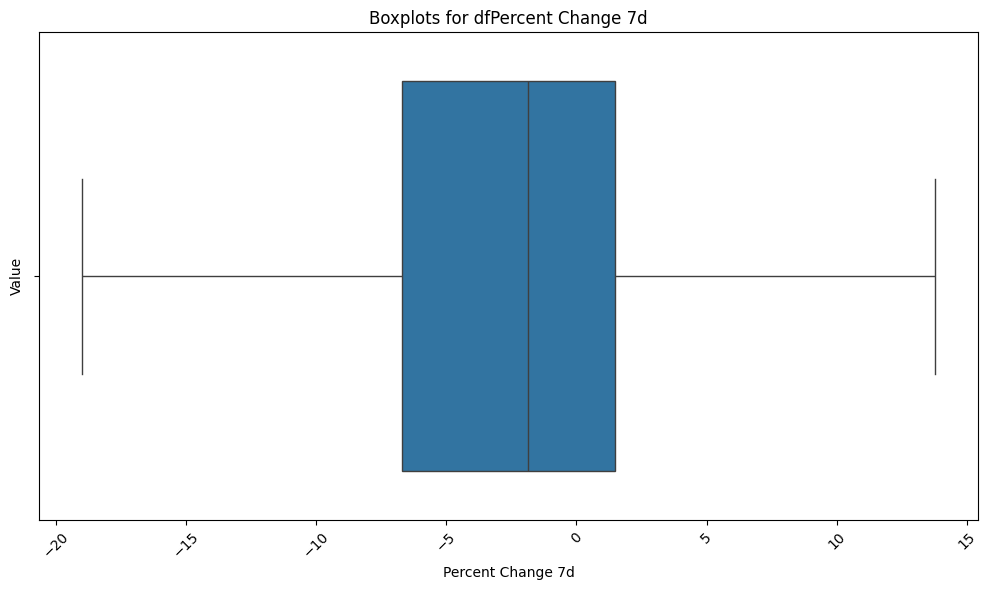

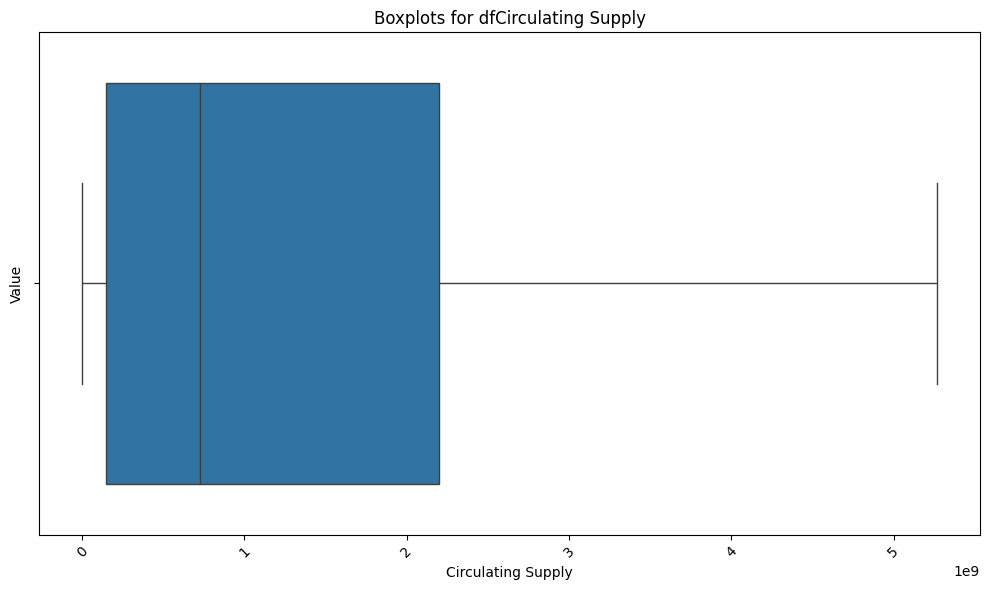

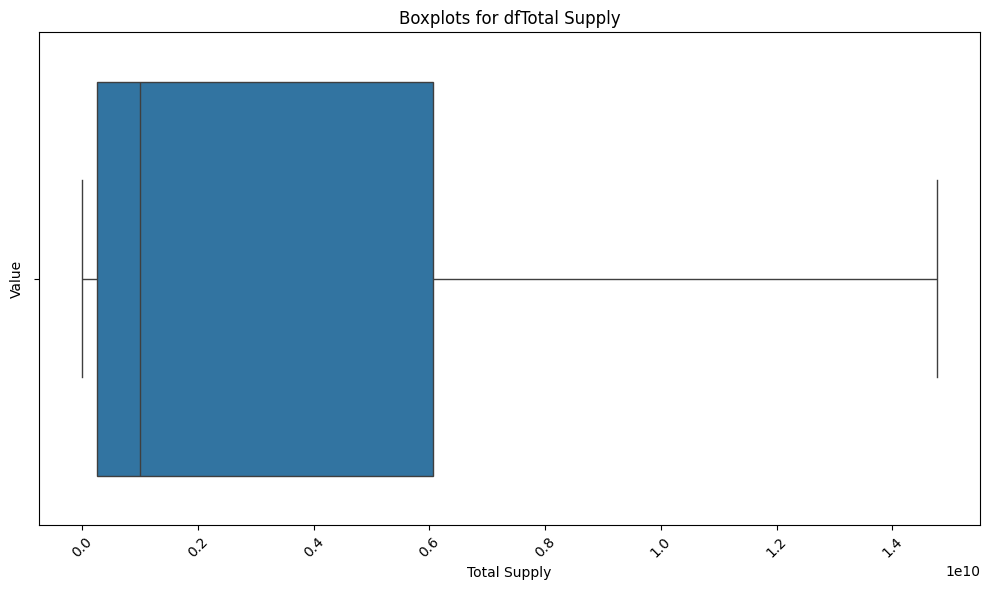

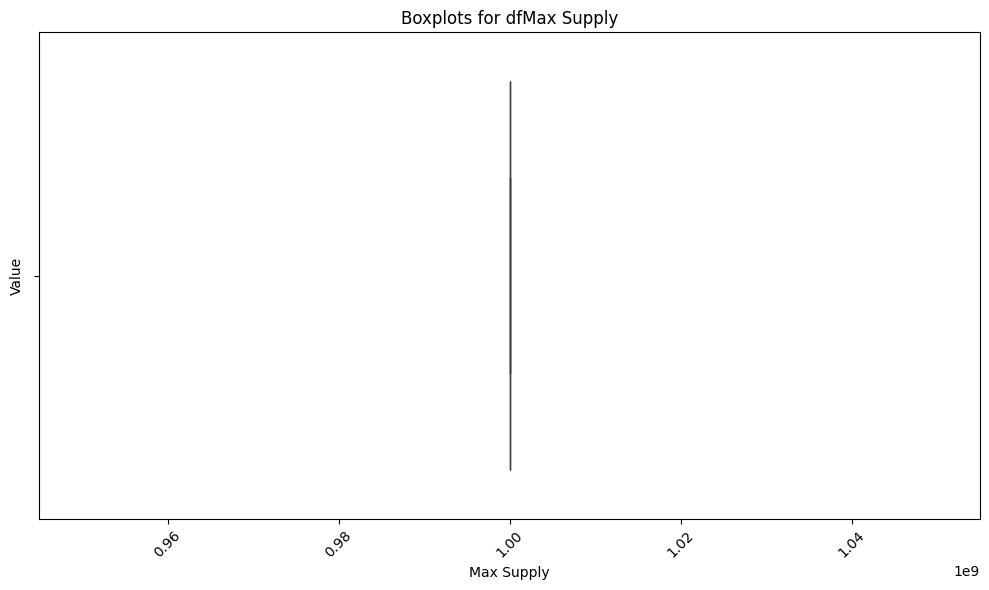

In [ ]:
find_outliers = ['Price (USD)',	'Market Cap (USD)',	'Volume (24h, USD)',	'Percent Change 1h',	'Percent Change 24h',	'Percent Change 7d','Circulating Supply',	'Total Supply',	'Max Supply']
for col in find_outliers:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplots for df{col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
numerical = df.select_dtypes(include=np.number).columns
for col in numerical:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  df[col] = df[col].clip(lower=lower, upper=upper)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1000 non-null   object 
 1   Symbol              1000 non-null   object 
 2   Price (USD)         1000 non-null   float64
 3   Market Cap (USD)    1000 non-null   float64
 4   Volume (24h, USD)   1000 non-null   float64
 5   Percent Change 1h   1000 non-null   float64
 6   Percent Change 24h  1000 non-null   float64
 7   Percent Change 7d   1000 non-null   float64
 8   Circulating Supply  1000 non-null   float64
 9   Total Supply        1000 non-null   float64
 10  Max Supply          615 non-null    float64
 11  Rank                1000 non-null   int64  
 12  Last Updated        1000 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 101.7+ KB


In [ ]:
Q1, Q3 = df[col].quantile([0.25, 0.75])
IQR = Q3 - Q1
lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df[(df[col] < lo) | (df[col] > hi)]
print("Outliers:", outliers.shape[0])


Outliers: 0


In [ ]:
print("Bounds:", lower, upper)
print("Min:", df[col].min(), "Max:", df[col].max())


Bounds: -498.5 1499.5
Min: 1 Max: 1000


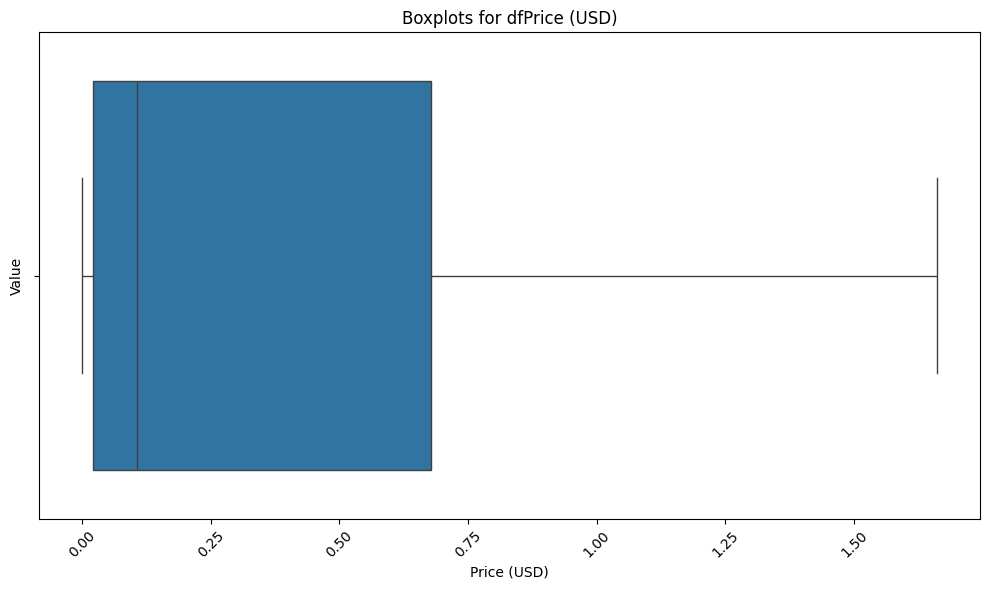

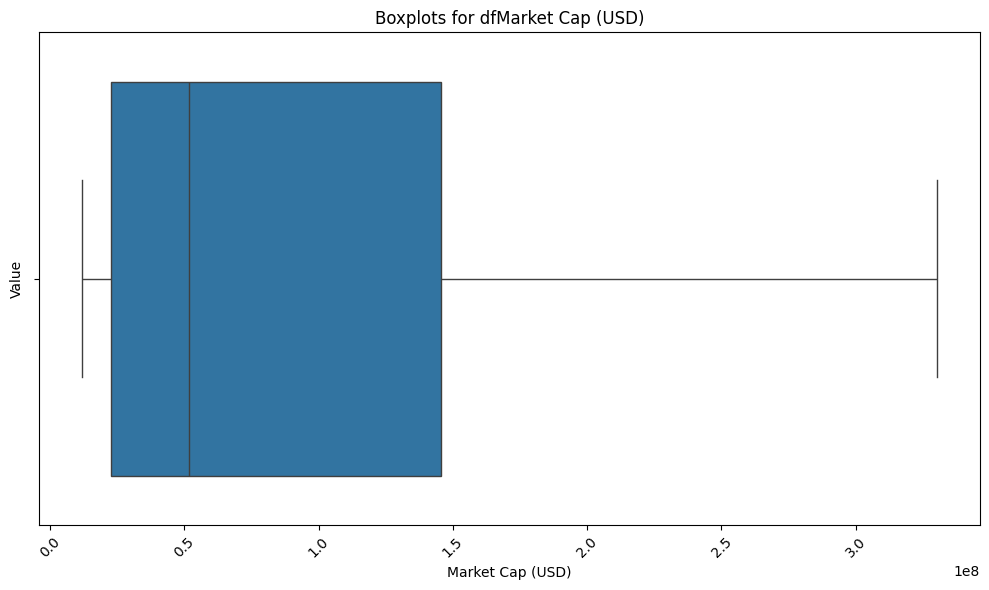

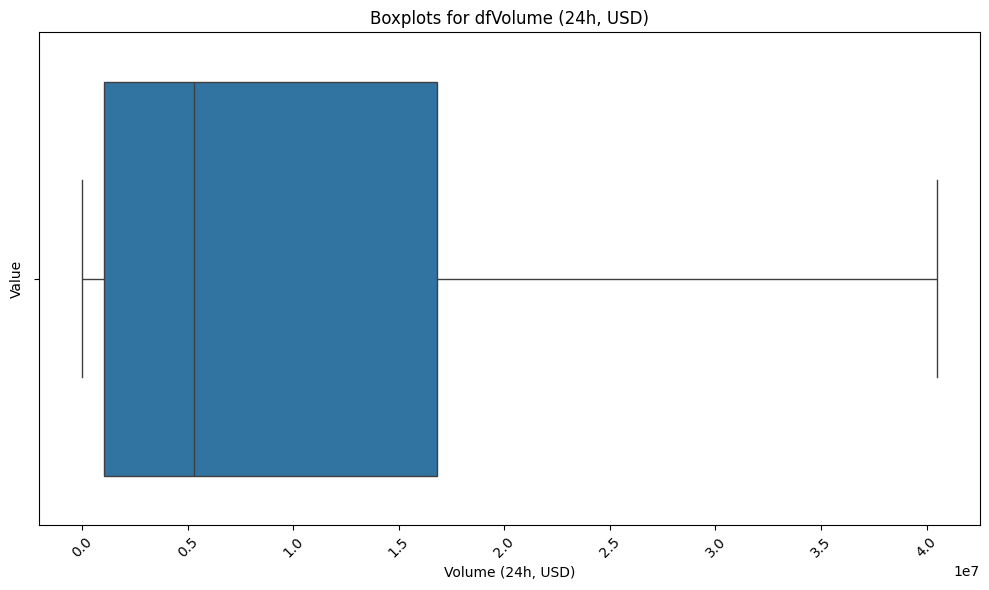

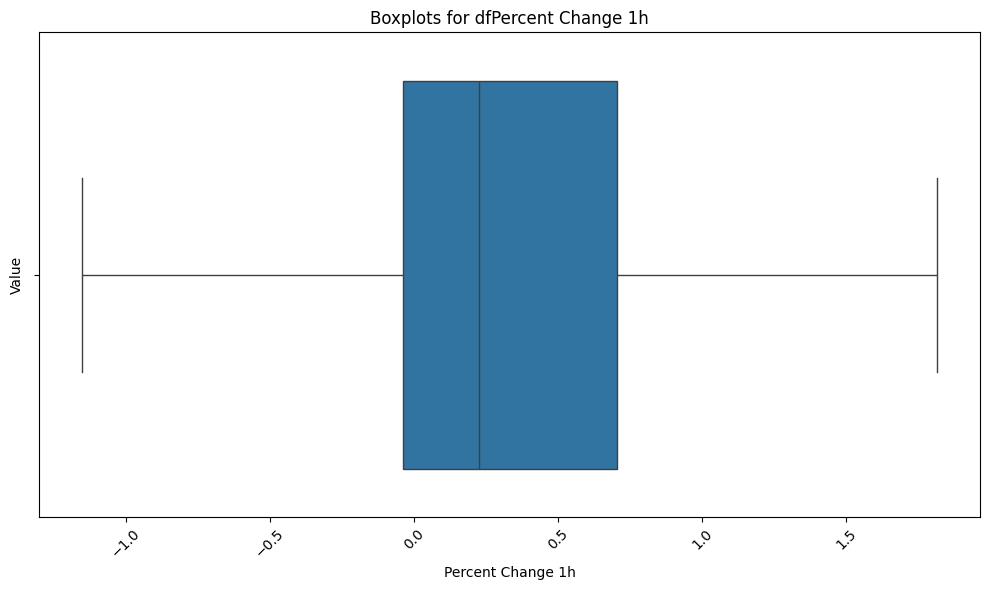

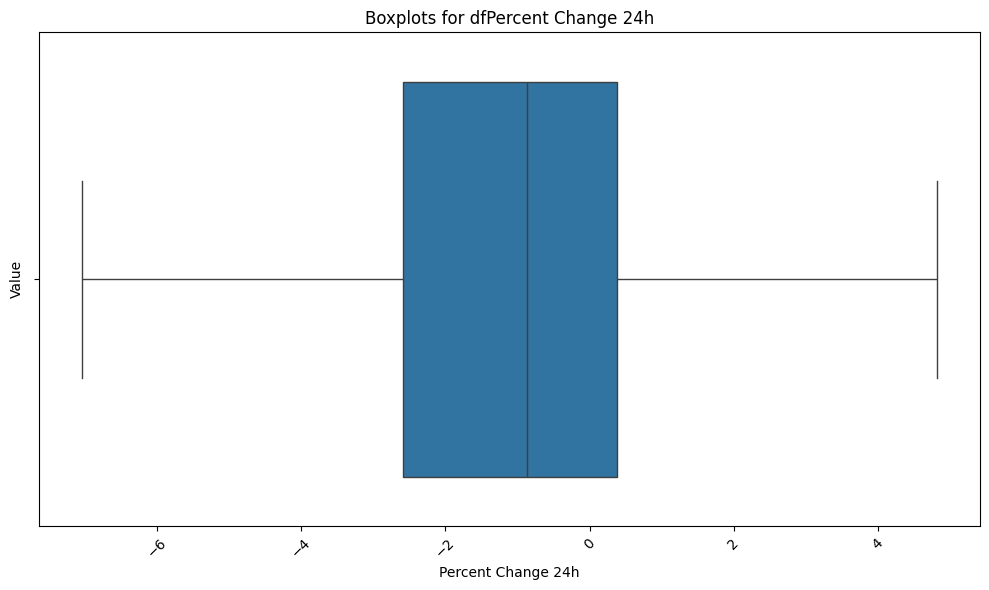

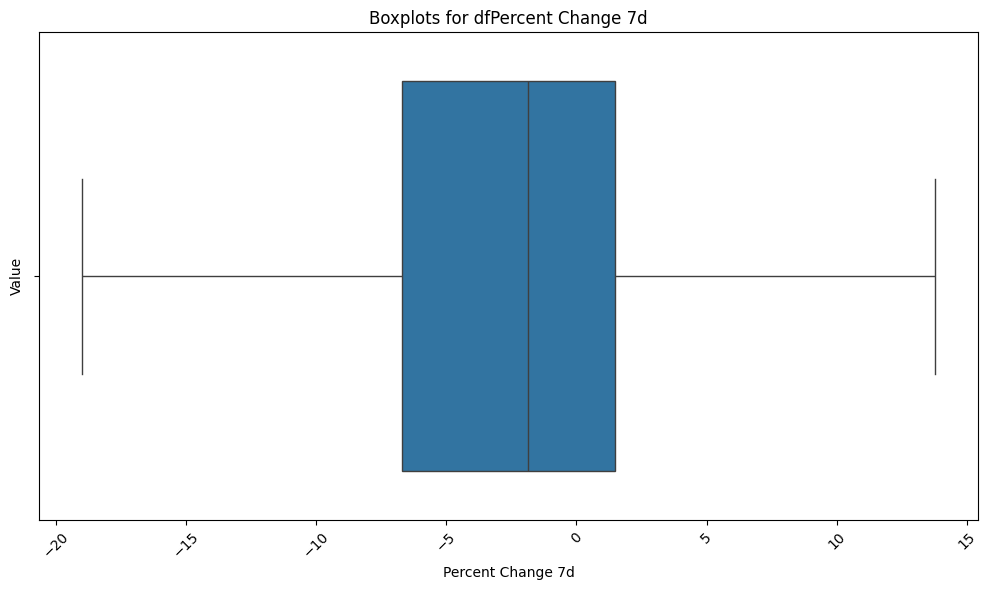

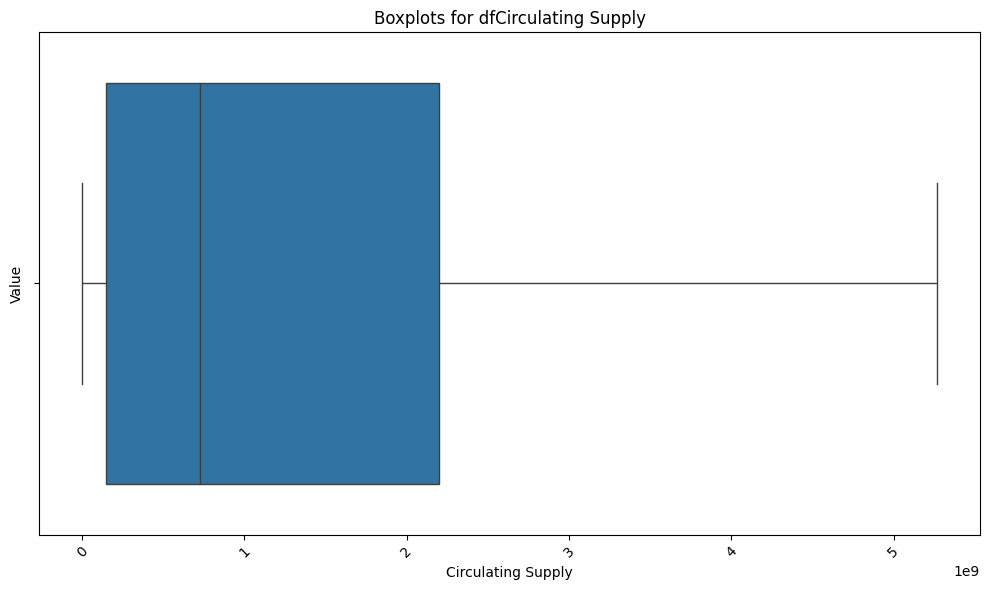

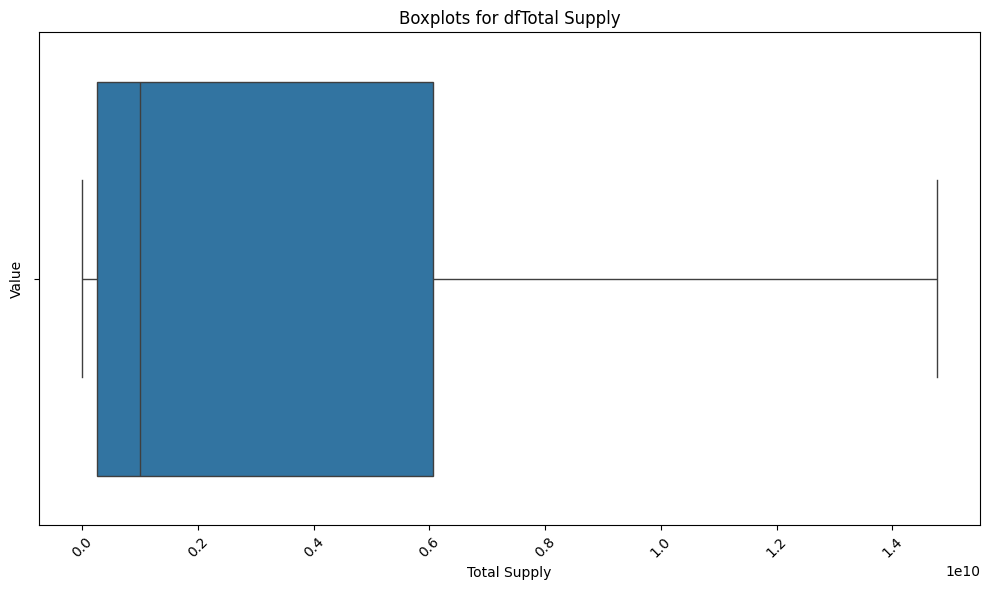

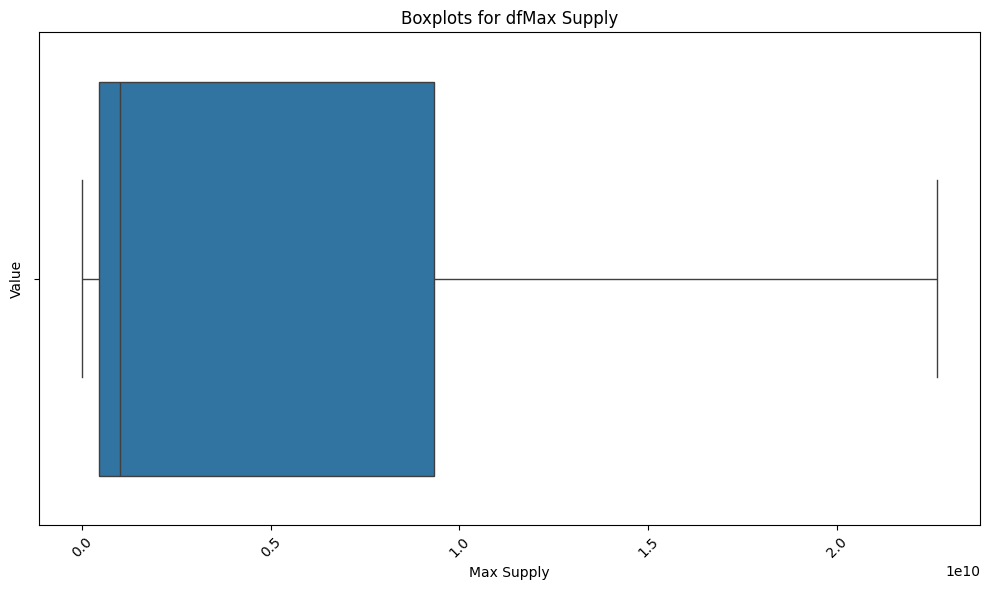

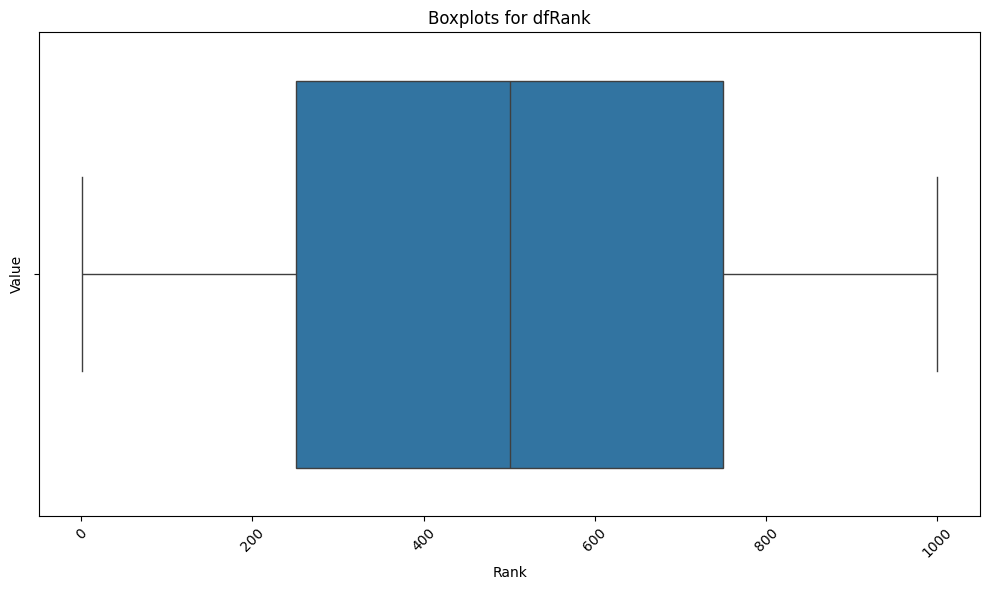

In [ ]:
for col in numerical:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplots for df{col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
Crypto_rank = df[['Name','Symbol','Rank']].head(10)
Crypto_rank

,Name,Symbol,Rank
0,Bitcoin,BTC,1
1,Ethereum,ETH,2
2,Tether USDt,USDT,3
3,XRP,XRP,4
4,BNB,BNB,5
5,Solana,SOL,6
6,USDC,USDC,7
7,TRON,TRX,8
8,Dogecoin,DOGE,9
9,Cardano,ADA,10


In [ ]:
Crypto_rank = df[['Name','Symbol','Rank']].tail(10)
Crypto_rank

,Name,Symbol,Rank
990,Central African Republic Meme,CAR,991
991,MEET48,IDOL,992
992,ASD,ASD,993
993,Decimal,DEL,994
994,TG Casino,TGC,995
995,FC Barcelona Fan Token,BAR,996
996,Quiztok,QTCON,997
997,Defigram,DFG,998
998,FIO Protocol,FIO,999
999,StormX,STMX,1000


In [ ]:
def classify_trend(row):
    if row['Percent Change 1h'] > 0 and row['Percent Change 24h'] > 0 and row['Percent Change 7d'] > 0:
        return 'Price increasing'
    elif row['Percent Change 1h'] < 0 and row['Percent Change 24h'] < 0 and row['Percent Change 7d'] < 0:
        return 'Price decreasing'
    else:
        return 'Mixed data'

df['trend_consistency'] = df.apply(classify_trend, axis=1)

# Count how many assets fall in each category
df['trend_consistency'].value_counts()

,count
trend_consistency,
Mixed data,719
Price decreasing,157
Price increasing,124


**Creating New columns:**

In [ ]:
percent_cols = ['Percent Change 1h', 'Percent Change 24h', 'Percent Change 7d']
for col in percent_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


for col in percent_cols:
    df[f'{col}_gain'] = df[col].apply(lambda x: x if x > 0 else 0)
    df[f'{col}_loss'] = df[col].apply(lambda x: -x if x < 0 else 0)


df[[col for col in df.columns if 'Percent Change' in col]].head()


,Percent Change 1h,Percent Change 24h,Percent Change 7d,Percent Change 1h_gain,Percent Change 1h_loss,Percent Change 24h_gain,Percent Change 24h_loss,Percent Change 7d_gain,Percent Change 7d_loss
0,0.085021,1.145346,3.020727,0.085021,0.000000,1.145346,0.000000,3.020727,0.000000
1,0.192818,1.892354,-1.144752,0.192818,0.000000,1.892354,0.000000,0.000000,1.144752
2,-0.000532,-0.008448,0.021298,0.000000,0.000532,0.000000,0.008448,0.021298,0.000000
3,0.159057,0.219334,1.590251,0.159057,0.000000,0.219334,0.000000,1.590251,0.000000
4,0.129658,0.315692,0.430374,0.129658,0.000000,0.315692,0.000000,0.430374,0.000000


# Univariante Analysis:

In [ ]:
num = df.select_dtypes(include = ["int", "float"])
def num_data(column):
  print("Count:",column.count())
  print("Min:",column.min())
  print("Max:",column.max())
  print("Avg:",column.mean())
  print("Median:",column.median())
  print("Variance:",column.var())
  print("STD:",column.std())
  print("Sum:",column.sum())

for i in num.columns:
  print("Description of:",i)
  num_data(df[i])
  print()

Description of: Price (USD)
Count: 1000
Min: 3.5214031303e-14
Max: 1.6615932122270958
Avg: 0.42420252862656543
Median: 0.1067394171413533
Variance: 0.34123715481756084
STD: 0.5841550777127259
Sum: 424.2025286265654

Description of: Market Cap (USD)
Count: 1000
Min: 11984394.826738428
Max: 330304055.29688275
Avg: 105820915.16496277
Median: 51973567.384305015
Variance: 1.2701109477042158e+16
STD: 112699199.0967201
Sum: 105820915164.96277

Description of: Volume (24h, USD)
Count: 1000
Min: 0.0
Max: 40506324.05091046
Avg: 11776724.709638877
Median: 5285164.68567667
Variance: 198826809834600.72
STD: 14100596.080825828
Sum: 11776724709.638876

Description of: Percent Change 1h
Count: 1000
Min: -1.15249115
Max: 1.81689419
Avg: 0.3032730816
Median: 0.22698293
Variance: 0.5051759327646663
STD: 0.7107572952595466
Sum: 303.2730816

Description of: Percent Change 24h
Count: 1000
Min: -7.039748245
Max: 4.823008635000001
Avg: -1.00046005155
Median: -0.8700095800000001
Variance: 8.712333776327117
STD

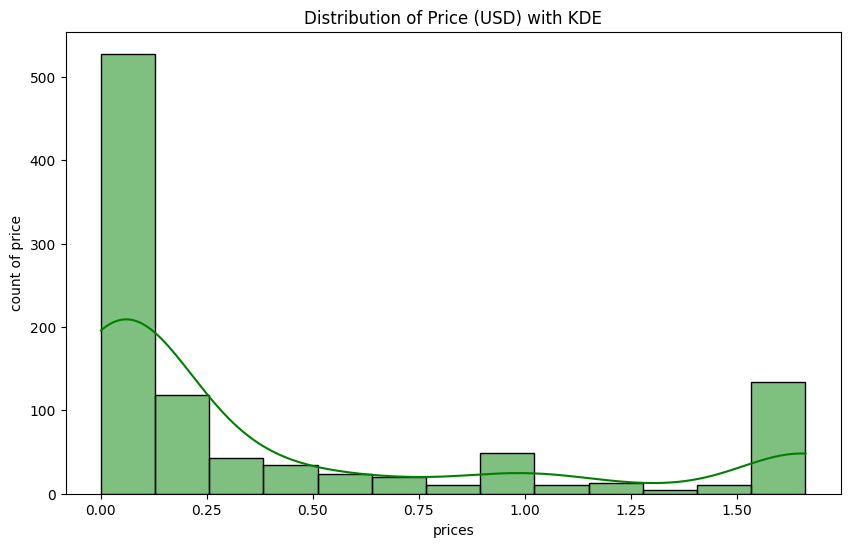

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Price (USD)", kde=True,color='green')
plt.xlabel("prices")
plt.ylabel("count of price")
plt.title("Distribution of Price (USD) with KDE")
plt.show()

In [ ]:
df[df['Price (USD)']>1.50]

,Name,Symbol,Price (USD),Market Cap (USD),"Volume (24h, USD)",Percent Change 1h,Percent Change 24h,Percent Change 7d,Circulating Supply,Total Supply,Max Supply,Rank,Last Updated,trend_consistency,Percent Change 1h_gain,Percent Change 1h_loss,Percent Change 24h_gain,Percent Change 24h_loss,Percent Change 7d_gain,Percent Change 7d_loss
0,Bitcoin,BTC,1.661593,3.303041e+08,4.050632e+07,0.085021,1.145346,3.020727,1.988366e+07,1.988366e+07,2.100000e+07,1,2025-06-26T08:01:00.000Z,Price increasing,0.085021,0.000000,1.145346,0.000000,3.020727,0.000000
1,Ethereum,ETH,1.661593,3.303041e+08,4.050632e+07,0.192818,1.892354,-1.144752,1.207183e+08,1.207183e+08,NaN,2,2025-06-26T08:01:00.000Z,Mixed data,0.192818,0.000000,1.892354,0.000000,0.000000,1.144752
3,XRP,XRP,1.661593,3.303041e+08,4.050632e+07,0.159057,0.219334,1.590251,5.268234e+09,1.477639e+10,2.265750e+10,4,2025-06-26T08:01:00.000Z,Price increasing,0.159057,0.000000,0.219334,0.000000,1.590251,0.000000
4,BNB,BNB,1.661593,3.303041e+08,4.050632e+07,0.129658,0.315692,0.430374,1.408857e+08,1.408857e+08,NaN,5,2025-06-26T08:00:00.000Z,Price increasing,0.129658,0.000000,0.315692,0.000000,0.430374,0.000000
5,Solana,SOL,1.661593,3.303041e+08,4.050632e+07,0.400392,-1.130869,0.178087,5.343295e+08,6.038707e+08,NaN,6,2025-06-26T08:00:00.000Z,Mixed data,0.400392,0.000000,0.000000,1.130869,0.178087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,QuickSwap [Old],QUICK,1.661593,1.576250e+07,2.154079e+04,-0.325052,1.621454,-19.002951,7.532267e+05,9.499378e+05,NaN,899,2025-06-26T08:01:00.000Z,Mixed data,0.000000,0.325052,1.621454,0.000000,0.000000,19.002951
911,Comtech Gold,CGO,1.661593,1.516299e+07,1.610424e+06,0.178996,0.430820,-0.599939,1.410000e+05,1.410000e+05,1.410000e+05,912,2025-06-26T08:01:00.000Z,Mixed data,0.178996,0.000000,0.430820,0.000000,0.000000,0.599939
962,Doge Killer,LEASH,1.661593,1.325296e+07,9.898371e+05,0.316708,2.236036,3.354141,1.064075e+05,1.075345e+05,NaN,963,2025-06-26T08:01:00.000Z,Price increasing,0.316708,0.000000,2.236036,0.000000,3.354141,0.000000
972,SuperTrust,SUT,1.661593,1.292358e+07,3.097485e+06,-0.124019,-0.308932,3.274156,2.024492e+06,1.884037e+08,2.384037e+08,973,2025-06-26T08:00:00.000Z,Mixed data,0.000000,0.124019,0.000000,0.308932,3.274156,0.000000


In [ ]:
filtered_df = df[(df['Price (USD)'] > 1.50) & (df['trend_consistency'] == 'Price increasing')]
filtered_df.shape

(25, 20)

In [ ]:
filtered_df = df[(df['Price (USD)'] > 1.50) & (df['trend_consistency'] == 'Price decreasing')]
filtered_df.shape

(12, 20)

In [ ]:
filtered_df = df[(df['Price (USD)'] > 1.50) & (df['trend_consistency'] == 'Mixed data')]
filtered_df.shape

(101, 20)

In [ ]:
Risk_df = df[(df['Price (USD)'] >0.90 ) &
                 (df['Price (USD)'] <= 1.2)]
Risk_df.shape

(64, 20)

In [ ]:
Risk_1 = df[(df['Price (USD)'] >0.90 ) &
                 (df['Price (USD)'] <= 1.2) &
                 (df['trend_consistency'] == 'Price increasing')]
Risk_1.shape

(14, 20)

In [ ]:
Risk_2 = df[(df['Price (USD)'] >0.90 ) &
                 (df['Price (USD)'] <= 1.2) &
                 (df['trend_consistency'] == 'Price decreasing')]
Risk_2.shape

(11, 20)

In [ ]:
Risk_3_df = df[(df['Price (USD)'] >0.00 ) &
                 (df['Price (USD)'] <= 0.15)]
Risk_3_df.shape

(562, 20)

In [ ]:
Risk_31 = df[(df['Price (USD)'] >0.00 ) &
                 (df['Price (USD)'] <= 0.15) &
                 (df['trend_consistency'] == 'Price increasing')]
Risk_31.shape

(66, 20)

In [ ]:
Risk_3 = df[(df['Price (USD)'] >0.00 ) &
                 (df['Price (USD)'] <= 0.15) &
                 (df['trend_consistency'] == 'Price decreasing')]
Risk_3.shape

(96, 20)

In [ ]:
Risk_32 = df[(df['Price (USD)'] >0.00 ) &
                 (df['Price (USD)'] <= 0.15) &
                 (df['trend_consistency'] == 'Mixed data')]
Risk_32.shape

(400, 20)

Insights:

562 people invested in cryptocurrencies priced between $0.00 and $0.15, showing that low-cost crypto attracts the majority of investors.

66  people got price increasing and 96 people got their price decreasing remaining 400 people got no increase or decrease

As the price increases, the number of investors drops, likely because people are more cautious or unwilling to take higher risks.

A small group of investors 64 people invested in the $0.90 to $1.2 range.

14 people got their price increasing and 11 people got their price decreasing remaining 39 people got no increase or decrease

Finally, despite the high price, more than 138 investors took the risk and invested in the $1.51 to $1.75 range.

25  people got their price increasing and 12 people got price decreasing and remainig 101 people got no increase or no decrease

The distribution is right-skewed, meaning that most of the investment is concentrated at the lower price levels, and only a few investors are willing to go for higher-priced options (mean> median)

In simple terms:
Most people prefer low-risk, low-price investments.

 Fewer people are willing to invest in high-priced crypto, but some still take the risk

In [ ]:
df[
    ['Percent Change 1h_gain','Percent Change 1h', 'Percent Change 1h_loss',
     'Percent Change 24h_gain','Percent Change 24h', 'Percent Change 24h_loss',
     'Percent Change 7d_gain','Percent Change 7d', 'Percent Change 7d_loss']
].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Percent Change 1h_gain,1000.0,0.441,0.534,0.000,0.000,0.227,0.703,1.817
Percent Change 1h,1000.0,0.303,0.711,-1.152,-0.039,0.227,0.703,1.817
Percent Change 1h_loss,1000.0,0.137,0.314,0.000,0.000,0.000,0.039,1.152
Percent Change 24h_gain,1000.0,0.680,1.435,0.000,0.000,0.000,0.374,4.823
Percent Change 24h,1000.0,-1.000,2.952,-7.040,-2.591,-0.870,0.374,4.823
Percent Change 24h_loss,1000.0,1.680,2.090,0.000,0.000,0.870,2.591,7.040
Percent Change 7d_gain,1000.0,1.949,3.994,0.000,0.000,0.000,1.492,13.789
Percent Change 7d,1000.0,-2.293,7.912,-19.003,-6.706,-1.856,1.492,13.789
Percent Change 7d_loss,1000.0,4.242,5.487,0.000,0.000,1.856,6.706,19.003


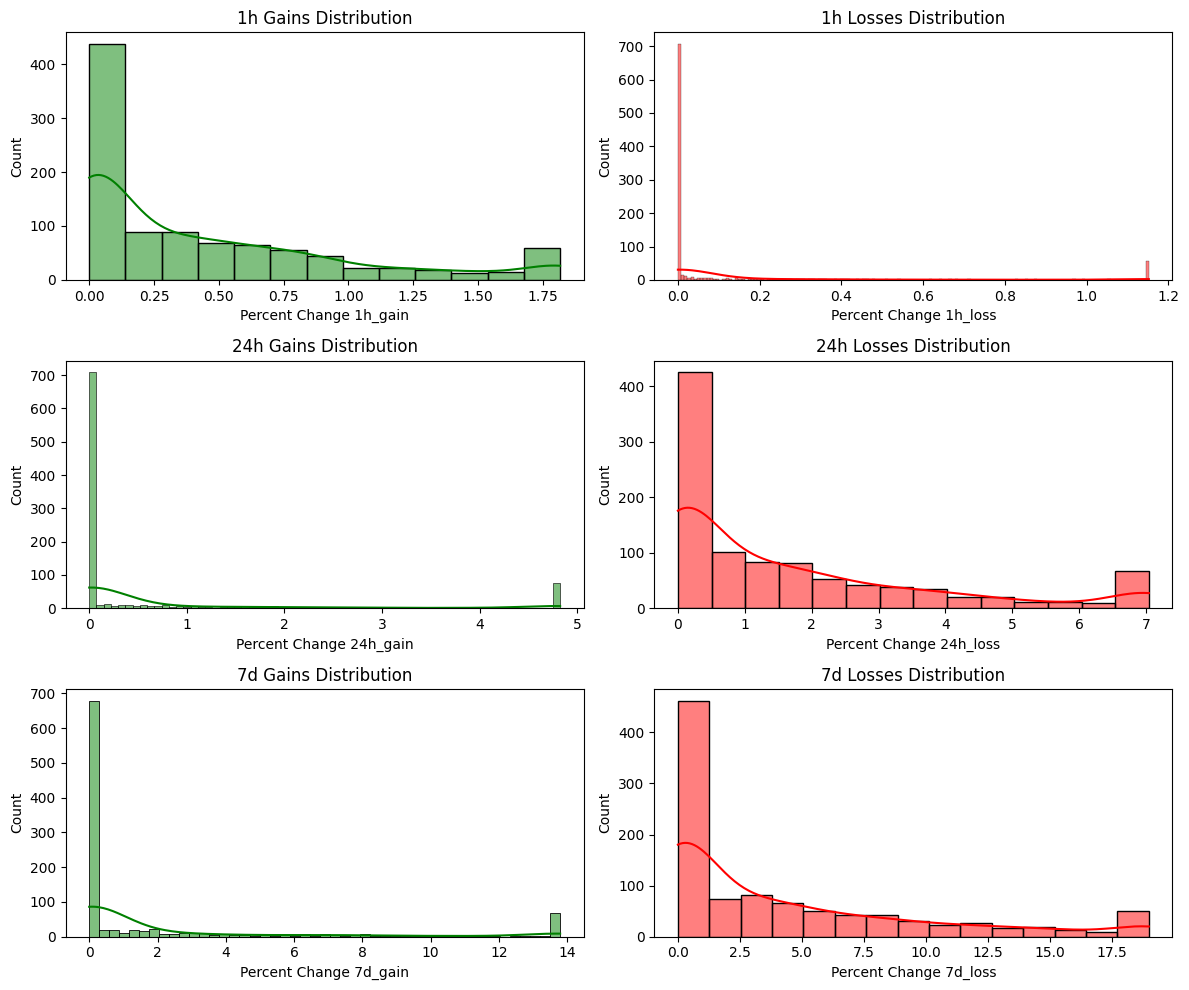

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
timeframes = ['1h', '24h', '7d']
for i, tf in enumerate(timeframes):
    sns.histplot(df[f'Percent Change {tf}_gain'], ax=axes[i, 0], kde=True, color='green')
    axes[i, 0].set_title(f'{tf} Gains Distribution')

    sns.histplot(df[f'Percent Change {tf}_loss'], ax=axes[i, 1], kde=True, color='red')
    axes[i, 1].set_title(f'{tf} Losses Distribution')

plt.tight_layout()
plt.show()

based on this plots we got insights lossses prices have more than gain prices 1Hour Comparsion:

1h Gains: Most prices increased slightly under 0.25% and slightly increased in the tail of the plot were 1.75

1h Losses: Many prices had small losses, but losses are more frequent than gains.

Conclusion: In the short term, the market tends to dip more often than rise.

24 hours Comparsion:

24h Gains: A few prices gained up to 5%, but most stayed below 2%.

24h Losses: Losses are more spread out, with some coins dropping up to 7%.

Conclusion: The market shows more risk than reward in a daily window.

7d Gains: Weekly gainers can go up to 14%, but are very rare.

7d Losses: Weekly losses are larger and more common, some dropping over 10%.

Conclusion: Weekly trends show higher volatility, with more potential for both big losses and rare strong gains.

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

In [ ]:
group = df.groupby(['Name', 'Price (USD)']).size().reset_index(name='count')
filter = group[(group['Price (USD)'] >= 0.00) & (group['Price (USD)'] <= 0.015)]
filter = filter[['Name', 'Price (USD)']]
filter

,Name,Price (USD)
4,AB,0.01022478
11,AMO Coin,0.00067358
12,ANDY (ETH),0.00005238
15,APENFT,0.00000044
28,Access Protocol,0.00114566
...,...,...
971,crow with knife,0.00000002
978,doginme,0.00048034
980,eCash,0.00001928
983,inSure DeFi,0.00080553


most of the investors are investing the crypto currencies range 0.00 to 0.15$

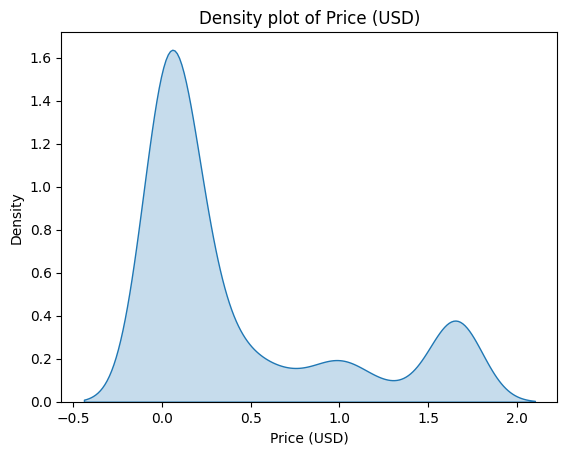

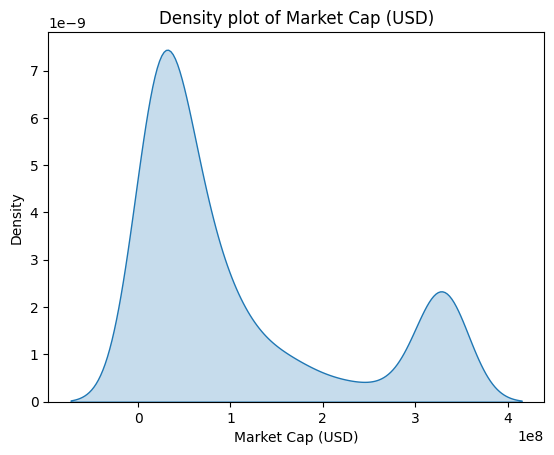

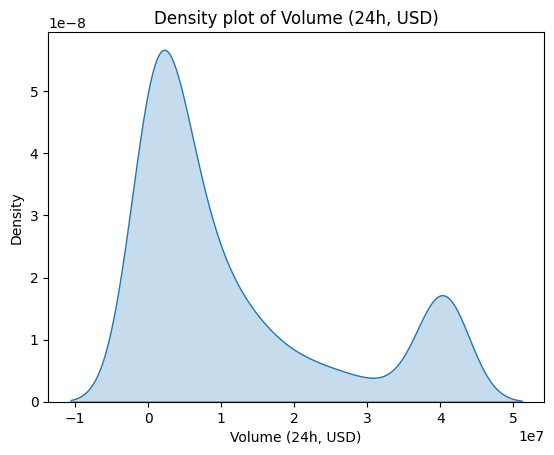

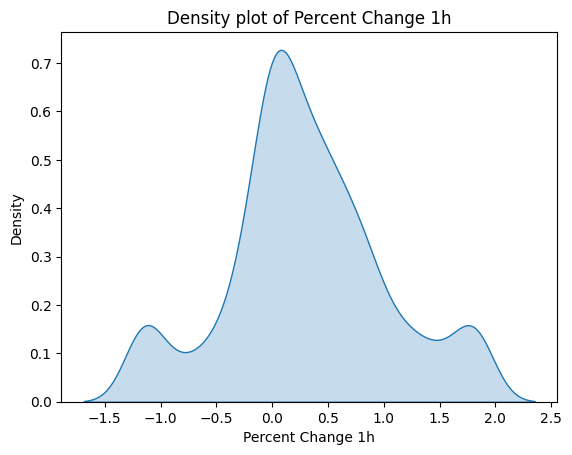

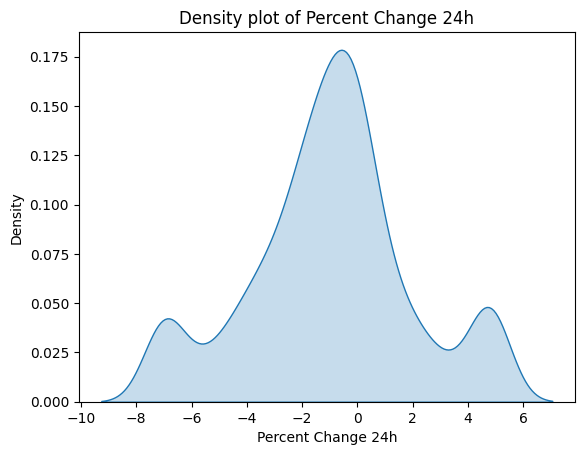

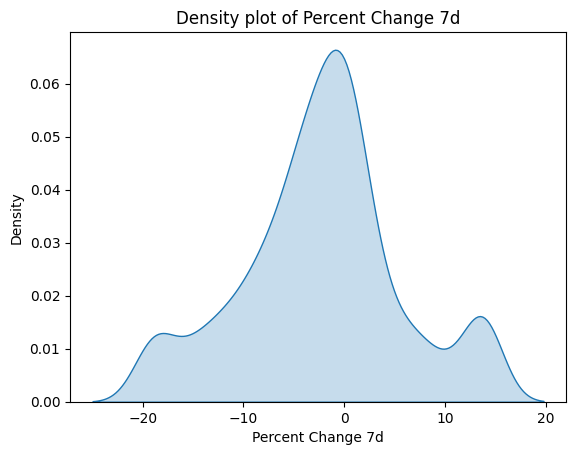

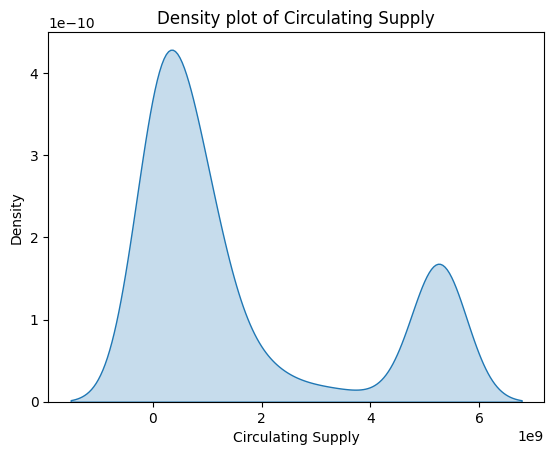

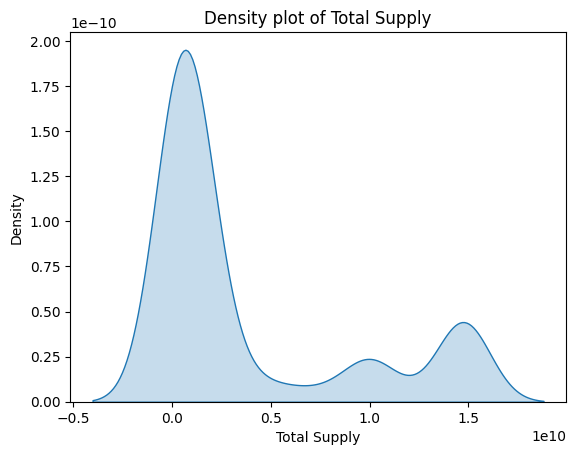

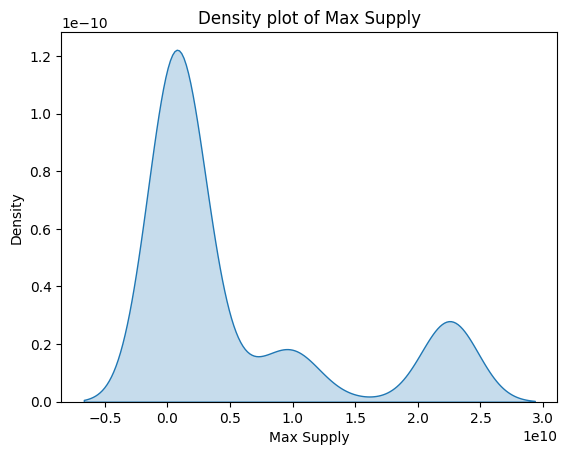

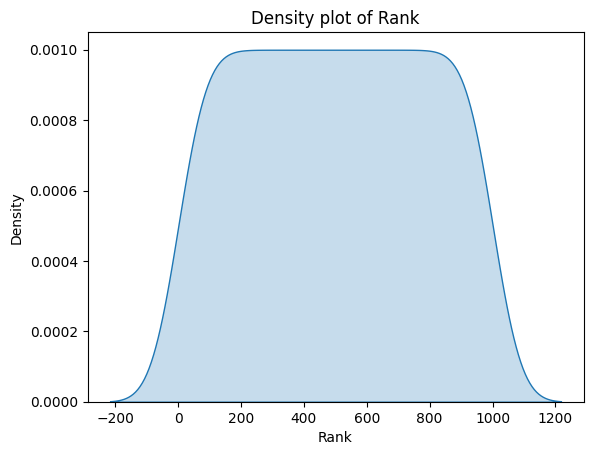

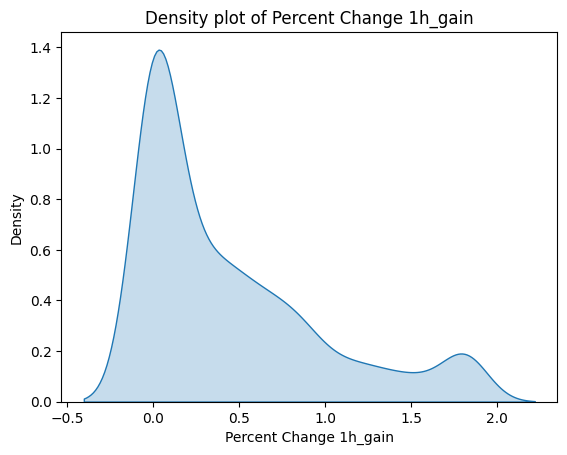

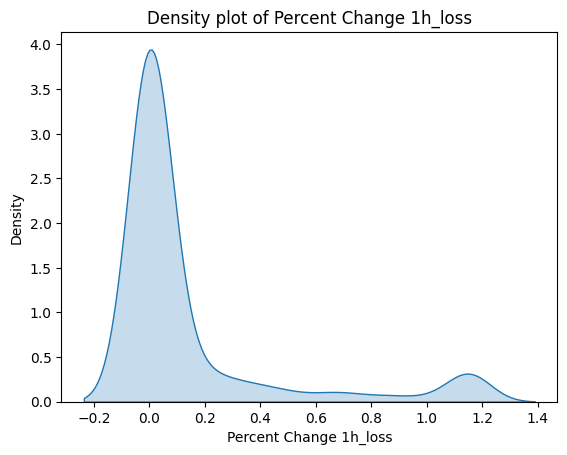

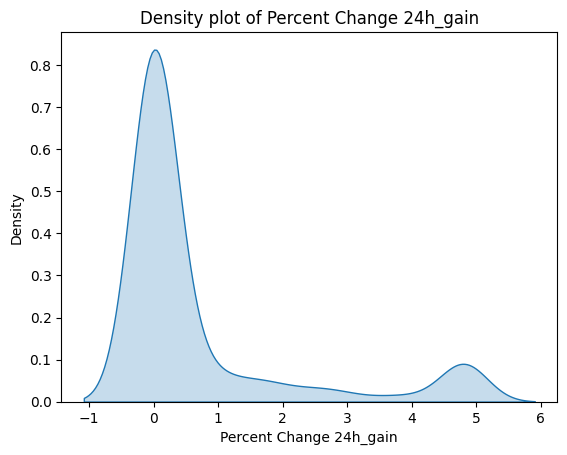

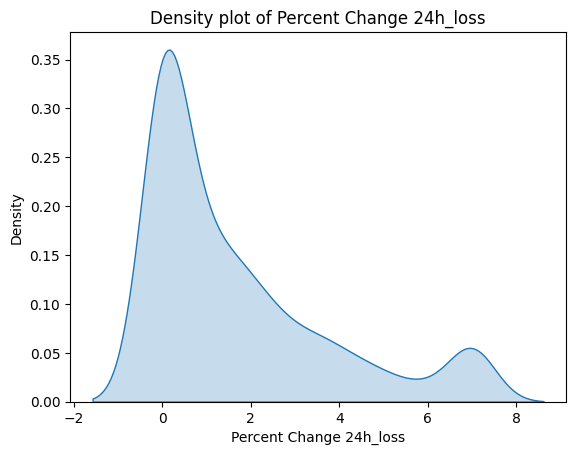

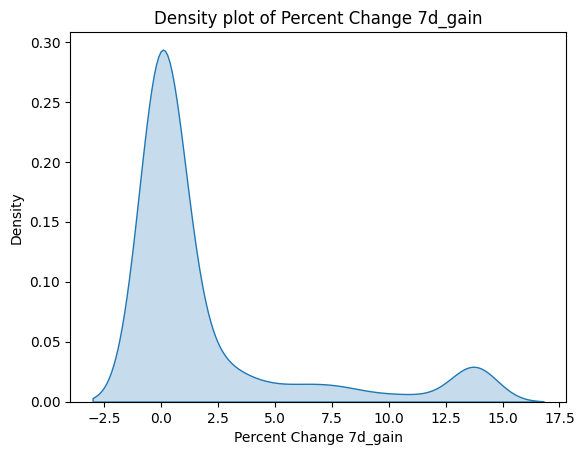

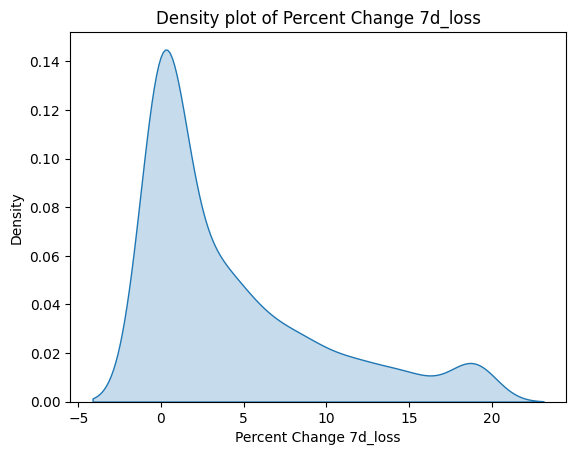

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns
for col in numerical_col:
  plt.figure()
  sns.kdeplot(x=col,data=df,fill=True)
  plt.title(f"Density plot of {col}")
  plt.show()

most of the kde plots are Right skwed this mean the major data points on left side and small data points in Right side and  

only Rank column is symmetrical bell curve and some of the perctang change 24h and 7 day we got left skwed

# **Bi-Variante Aanalysis**

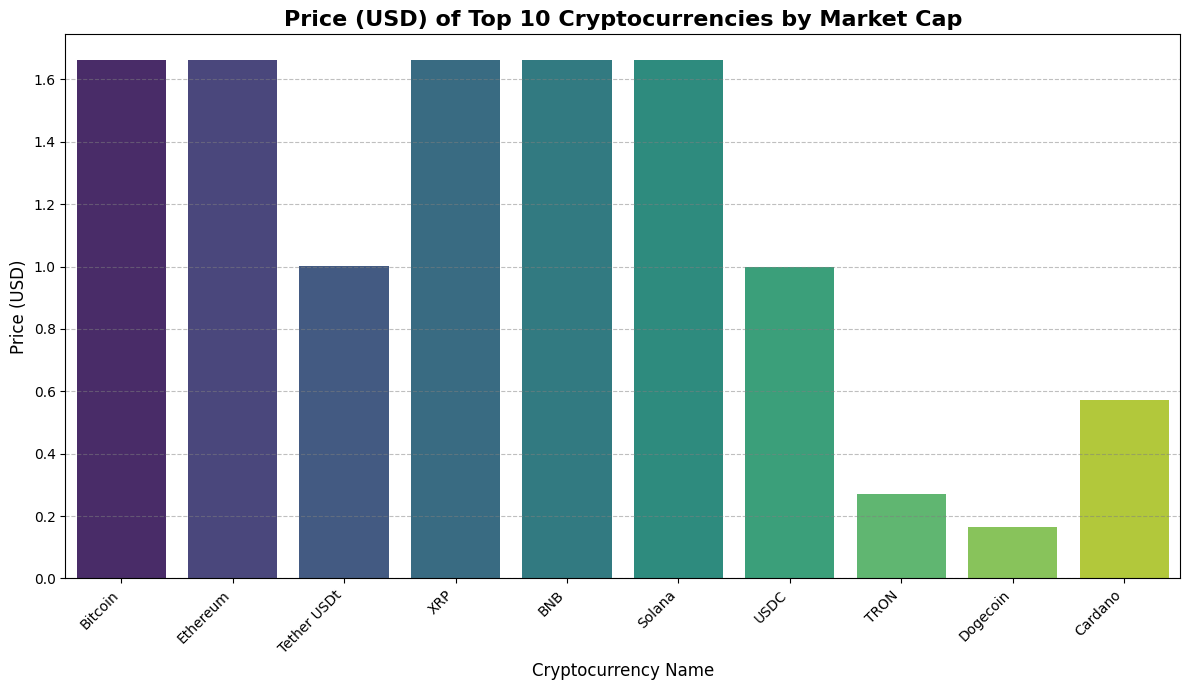

In [ ]:
top_10_by_market_cap = df.nlargest(10, 'Market Cap (USD)')
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_by_market_cap, x='Name', y='Price (USD)',hue="Name" ,palette='viridis')

plt.title('Price (USD) of Top 10 Cryptocurrencies by Market Cap', fontsize=16, fontweight='bold')
plt.xlabel('Cryptocurrency Name', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', which='major', color='gray', alpha=0.5)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

here the Top 10 crypto currencies according to market cap

here Bitcoin, Ethereum, XRP, BNB, Solana these are crypto currencies price over range above more than 1.6$ dollars

after that Tether USDt has price 1.00$ dollars

after we got Cardano around 0.55$ dollars and then we got Tron  we got around 0.25$  and Dogecoin is price around 0.15$

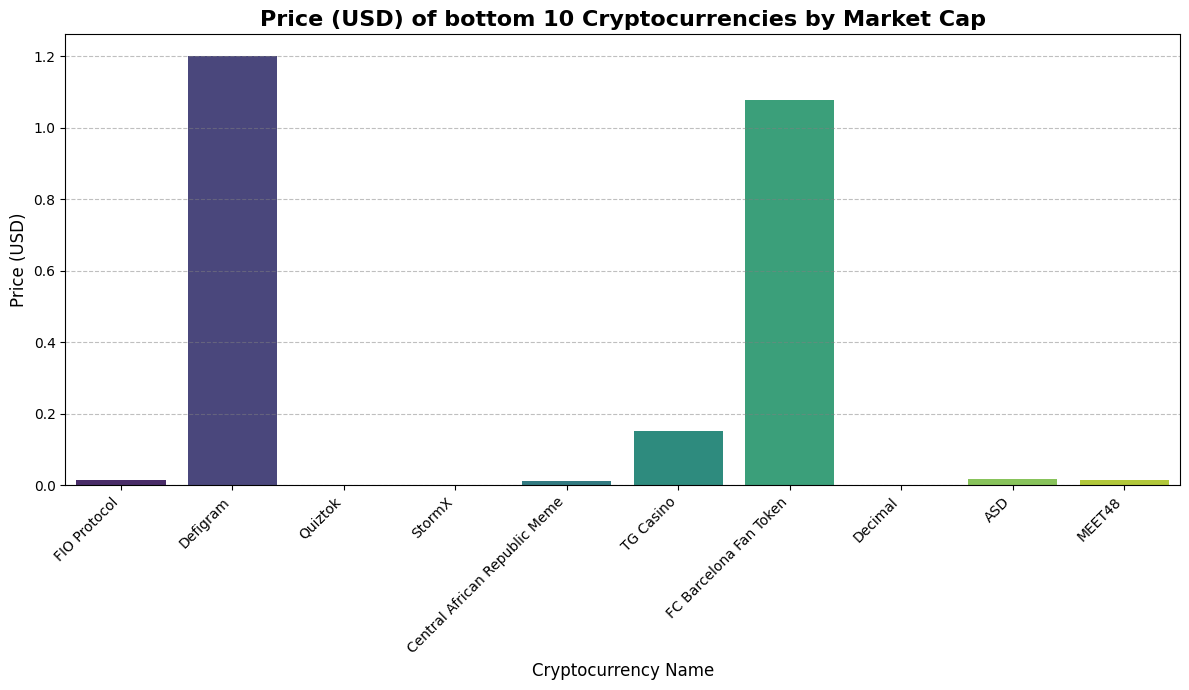

In [ ]:
bottom_10_by_market_cap = df.nsmallest(10, 'Market Cap (USD)')
plt.figure(figsize=(12, 7))
sns.barplot(data=bottom_10_by_market_cap, x='Name', y='Price (USD)',hue="Name" ,palette='viridis')

plt.title('Price (USD) of bottom 10 Cryptocurrencies by Market Cap', fontsize=16, fontweight='bold')
plt.xlabel('Cryptocurrency Name', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', which='major', color='gray', alpha=0.5)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df[
    ['Percent Change 1h_gain', 'Percent Change 1h_loss',
     'Percent Change 24h_gain', 'Percent Change 24h_loss',
     'Percent Change 7d_gain', 'Percent Change 7d_loss']
].describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
Percent Change 1h_gain,1000.00000000,0.44100000,0.53400000,0.00000000,0.00000000,0.22700000,0.70300000,1.81700000
Percent Change 1h_loss,1000.00000000,0.13700000,0.31400000,0.00000000,0.00000000,0.00000000,0.03900000,1.15200000
Percent Change 24h_gain,1000.00000000,0.68000000,1.43500000,0.00000000,0.00000000,0.00000000,0.37400000,4.82300000
Percent Change 24h_loss,1000.00000000,1.68000000,2.09000000,0.00000000,0.00000000,0.87000000,2.59100000,7.04000000
Percent Change 7d_gain,1000.00000000,1.94900000,3.99400000,0.00000000,0.00000000,0.00000000,1.49200000,13.78900000
Percent Change 7d_loss,1000.00000000,4.24200000,5.48700000,0.00000000,0.00000000,1.85600000,6.70600000,19.00300000


In [ ]:
top_10_gain_1h = df.sort_values(by='Percent Change 1h_gain', ascending=False).head(10)
top_10_gain_24h = df.sort_values(by='Percent Change 24h_gain', ascending=False).head(10)
top_10_gain_7d = df.sort_values(by='Percent Change 7d_gain', ascending=False).head(10)

# loss
top_10_loss_1h = df.sort_values(by='Percent Change 1h_loss', ascending=False).head(10)
top_10_loss_24h = df.sort_values(by='Percent Change 24h_loss', ascending=False).head(10)
top_10_loss_7d = df.sort_values(by='Percent Change 7d_loss', ascending=False).head(10)


In [ ]:
print("Top 10 Gainers (1h):")
print(top_10_gain_1h[['Name', 'Percent Change 1h']])

print("\nTop 10 Gainers (24h):")
print(top_10_gain_24h[['Name', 'Percent Change 24h']])

print("\nTop 10 Gainers (7d):")
print(top_10_gain_7d[['Name', 'Percent Change 7d']])

Top 10 Gainers (1h):
                    Name  Percent Change 1h
987                SIDUS         1.81689419
999               StormX         1.81689419
291           Centrifuge         1.81689419
336        Constellation         1.81689419
379               Audius         1.81689419
391  Rekt (rektcoin.com)         1.81689419
897               Biswap         1.81689419
907          TROLL (SOL)         1.81689419
908               Cortex         1.81689419
920          REI Network         1.81689419

Top 10 Gainers (24h):
                       Name  Percent Change 24h
327  HashKey Platform Token          4.82300864
923                 Janitor          4.82300864
348           AI Companions          4.82300864
951                Spectral          4.82300864
929                    GYEN          4.82300864
39                    Kaspa          4.82300864
940                    Gems          4.82300864
897                  Biswap          4.82300864
905                Cult DAO          4.8

In [ ]:
print("Top 10 losses (1h):")
print(top_10_loss_1h[['Name', 'Percent Change 1h']])

print("\nTop 10 losses (24h):")
print(top_10_loss_24h[['Name', 'Percent Change 24h']])

print("\nTop 10 losses (7d):")
print(top_10_loss_7d[['Name', 'Percent Change 7d']])

Top 10 losses (1h):
                 Name  Percent Change 1h
982      PeiPei (ETH)        -1.15249115
945       Aki Network        -1.15249115
923           Janitor        -1.15249115
964  Vector Smart Gas        -1.15249115
303          FUNToken        -1.15249115
373           TARS AI        -1.15249115
967              zKML        -1.15249115
867             SIGMA        -1.15249115
435             Spark        -1.15249115
398    Stronghold SHx        -1.15249115

Top 10 losses (24h):
                  Name  Percent Change 24h
571                NEM         -7.03974825
952       Shadow Token         -7.03974825
954              REVOX         -7.03974825
580               Roam         -7.03974825
586               Test         -7.03974825
590            PinLink         -7.03974825
510            GEODNET         -7.03974825
483         Braintrust         -7.03974825
491           Pundi AI         -7.03974825
469  Humanity Protocol         -7.03974825

Top 10 losses (7d):
             

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(-1.5, 0, '−1.5'),
  Text(-1.0, 0, '−1.0'),
  Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0')])

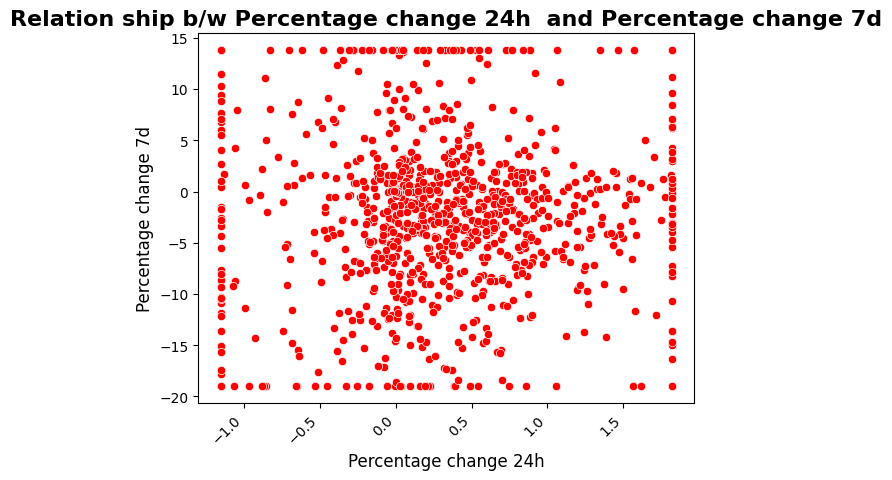

In [ ]:
sns.scatterplot(x='Percent Change 1h',y = 'Percent Change 7d',data=df,color = 'Red')
plt.title('Relation ship b/w Percentage change 24h  and Percentage change 7d', fontsize=16, fontweight='bold')
plt.xlabel('Percentage change 24h', fontsize=12)
plt.ylabel('Percentage change 7d', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.]),
 [Text(-8.0, 0, '−8'),
  Text(-6.0, 0, '−6'),
  Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6')])

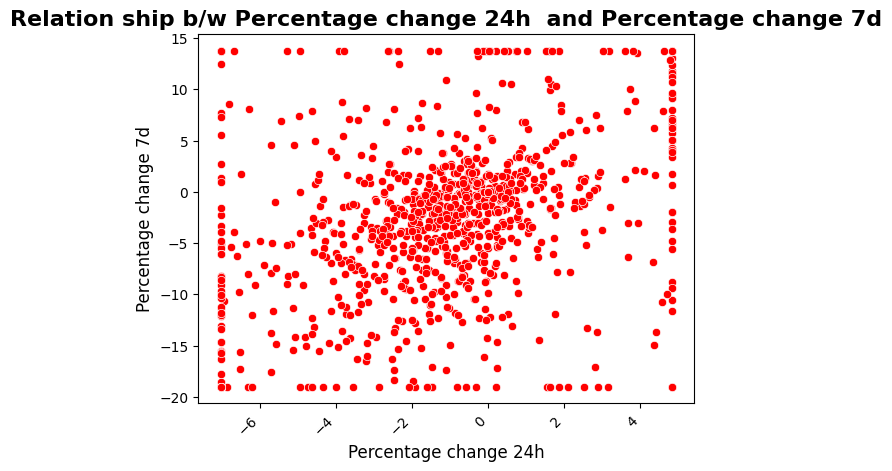

In [ ]:
sns.scatterplot(x='Percent Change 24h',y = 'Percent Change 7d',data=df,color = 'Red')
plt.title('Relation ship b/w Percentage change 24h  and Percentage change 7d', fontsize=16, fontweight='bold')
plt.xlabel('Percentage change 24h', fontsize=12)
plt.ylabel('Percentage change 7d', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

it has a slight positive relation between 24hour and 7days percentage changes.

In simple words, when the price moves up or down in 24hours, it kind of keeps moving in that same direction over 7days but not always.

The dots are spread out, so the connection isn’t super strong, but you can still see a bit of a trend going upward.

There are also a lot of outliers, like sudden big jumps or drops, which means the market can be pretty volatile.

Most of the data points are clustered around 0 at both axis, meaning small changes are occured.

Overall, 24hours change gives a small hint about what might happen in 7days, but it’s not super reliable on its own.


(array([-2.0e+09,  0.0e+00,  2.0e+09,  4.0e+09,  6.0e+09,  8.0e+09,
         1.0e+10,  1.2e+10,  1.4e+10,  1.6e+10]),
 [Text(-2000000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000000.0, 0, '0.2'),
  Text(4000000000.0, 0, '0.4'),
  Text(6000000000.0, 0, '0.6'),
  Text(8000000000.0, 0, '0.8'),
  Text(10000000000.0, 0, '1.0'),
  Text(12000000000.0, 0, '1.2'),
  Text(14000000000.0, 0, '1.4'),
  Text(16000000000.0, 0, '1.6')])

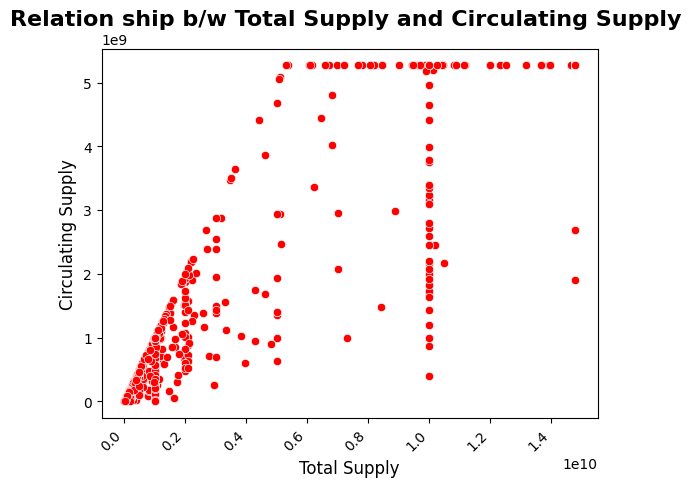

In [ ]:
sns.scatterplot(x='Total Supply',y = 'Circulating Supply',data=df,color = 'Red')
plt.title('Relation ship b/w Total Supply and Circulating Supply ', fontsize=16, fontweight='bold')
plt.xlabel('Total Supply', fontsize=12)
plt.ylabel('Circulating Supply', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

(array([-2.0e+09,  0.0e+00,  2.0e+09,  4.0e+09,  6.0e+09,  8.0e+09,
         1.0e+10,  1.2e+10,  1.4e+10,  1.6e+10]),
 [Text(-2000000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(2000000000.0, 0, '0.2'),
  Text(4000000000.0, 0, '0.4'),
  Text(6000000000.0, 0, '0.6'),
  Text(8000000000.0, 0, '0.8'),
  Text(10000000000.0, 0, '1.0'),
  Text(12000000000.0, 0, '1.2'),
  Text(14000000000.0, 0, '1.4'),
  Text(16000000000.0, 0, '1.6')])

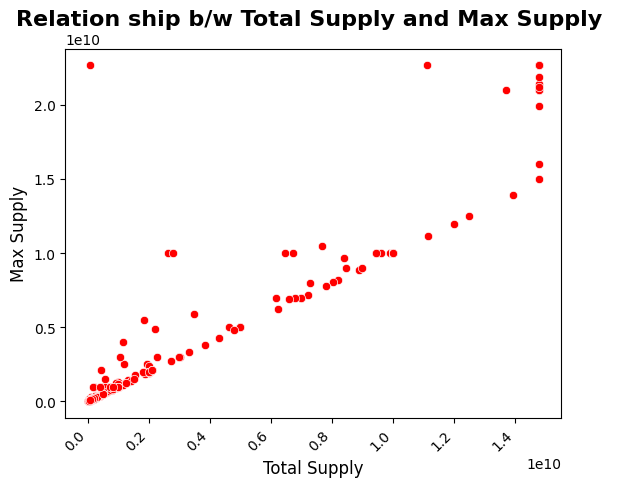

In [ ]:
sns.scatterplot(x='Total Supply',y = 'Max Supply',data=df,color = 'Red')
plt.title('Relation ship b/w Total Supply and Max Supply ', fontsize=16, fontweight='bold')
plt.xlabel('Total Supply', fontsize=12)
plt.ylabel('Max Supply', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

(array([-1.e+09,  0.e+00,  1.e+09,  2.e+09,  3.e+09,  4.e+09,  5.e+09,
         6.e+09]),
 [Text(-1000000000.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1000000000.0, 0, '1'),
  Text(2000000000.0, 0, '2'),
  Text(3000000000.0, 0, '3'),
  Text(4000000000.0, 0, '4'),
  Text(5000000000.0, 0, '5'),
  Text(6000000000.0, 0, '6')])

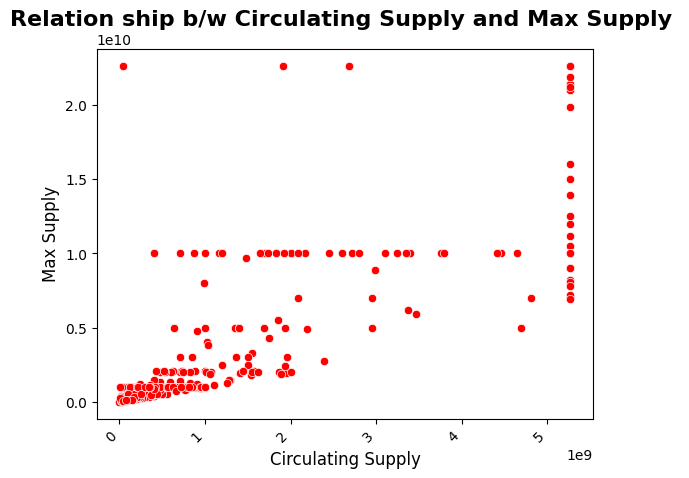

In [ ]:
sns.scatterplot(x='Circulating Supply',y = 'Max Supply',data=df,color = 'Red')
plt.title('Relation ship b/w Circulating Supply and Max Supply ', fontsize=16, fontweight='bold')
plt.xlabel('Circulating Supply', fontsize=12)
plt.ylabel('Max Supply', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

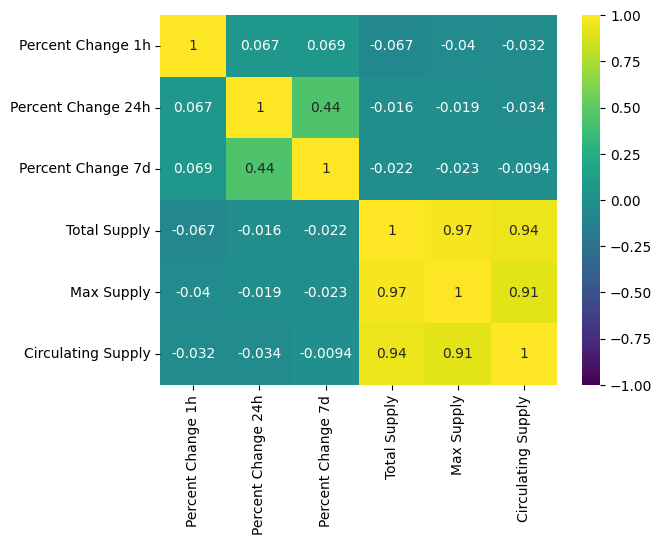

In [ ]:
relations=df[['Percent Change 1h', 'Percent Change 24h', 'Percent Change 7d','Total Supply', 'Max Supply', 'Circulating Supply']].corr()
sns.heatmap(data=relations,annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()


There's almost no relationship between 1-hour and 24-hour and 1hour and 7days price changes — so, 1-hour movements don’t help predict what will happen in 24 hours.

There is a moderate positive relationship between 24-hour and 7-day changes — if a coin does well in 24 hours, it might continue to do well over the week.

This means 24-hour trends can give a small clue about weekly performance, but 1-hour trends are mostly random.

You can also look for coins that are consistently going up or down across all three timeframes — they might be more reliable to watch.

here we have perfect relation ship b/w Total supply and max supply,total supply and circculating supply and max supply and circulating supply

these three are highly corelated which means using all three in ML models can lead to multicollinearity.

In [ ]:
most_invested_crypto = df.loc[df['Market Cap (USD)'].idxmax()]

# Print the result
print("Most Invested Cryptocurrency:")
most_invested_crypto[['Name', 'Symbol', 'Market Cap (USD)','Price (USD)']]


Most Invested Cryptocurrency:


,0
Name,Bitcoin
Symbol,BTC
Market Cap (USD),330304055.29688275
Price (USD),1.66159321


According to Market cap the Bitcoin is the most invested currency

In [ ]:
least_invested_crypto = df.loc[df['Market Cap (USD)'].idxmin()]

# Print the result
print("least Invested Cryptocurrency:")
least_invested_crypto[['Name', 'Symbol', 'Market Cap (USD)']]

least Invested Cryptocurrency:


,998
Name,FIO Protocol
Symbol,FIO
Market Cap (USD),11984394.82673843


According to Market cap the FIO Protoco is the least invested currency

In [ ]:
max_supply = df.loc[df['Total Supply'].idxmax()]
max_supply


,2
Name,Tether USDt
Symbol,USDT
Price (USD),1.00042518
Market Cap (USD),330304055.29688275
"Volume (24h, USD)",40506324.05091046
Percent Change 1h,-0.00053204
Percent Change 24h,-0.00844754
Percent Change 7d,0.02129827
Circulating Supply,5268233908.75000000
Total Supply,14776388703.28286171


In [ ]:
min_supply = df.loc[df['Total Supply'].idxmin()]
min_supply

,560
Name,Matrixdock Gold
Symbol,XAUM
Price (USD),1.66159321
Market Cap (USD),42403319.08263042
"Volume (24h, USD)",277506.99106545
Percent Change 1h,0.17228925
Percent Change 24h,0.44283653
Percent Change 7d,-0.61321496
Circulating Supply,12604.12442595
Total Supply,12604.12442595


In [ ]:
# Find the cryptocurrency with the maximum Circulating SupplyCirculating Supply
max_circulating_supply_crypto = df.loc[df['Circulating Supply'].idxmax()]

# Display the name, symbol, and circulating supply of this cryptocurrency
print("Cryptocurrency with the maximum Circulating Supply:")
display(max_circulating_supply_crypto[['Name', 'Symbol', 'Circulating Supply']])

Cryptocurrency with the maximum Circulating Supply:


,2
Name,Tether USDt
Symbol,USDT
Circulating Supply,5268233908.75000000


In [ ]:
min_circulating_supply_crypto = df.loc[df['Circulating Supply'].idxmin()]

display(min_circulating_supply_crypto[['Name', 'Symbol', 'Circulating Supply']])

,560
Name,Matrixdock Gold
Symbol,XAUM
Circulating Supply,12604.12442595


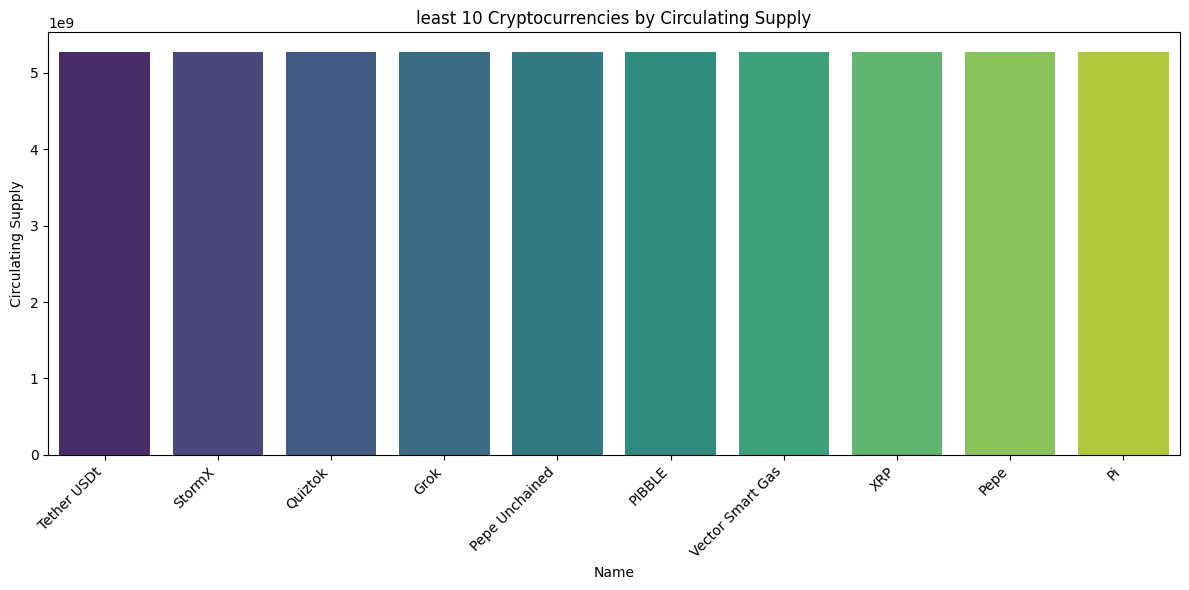

In [ ]:
top_supply = df.sort_values(by='Circulating Supply', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_supply, x='Name', y='Circulating Supply',hue = "Name",palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("least 10 Cryptocurrencies by Circulating Supply")
plt.tight_layout()
plt.show()


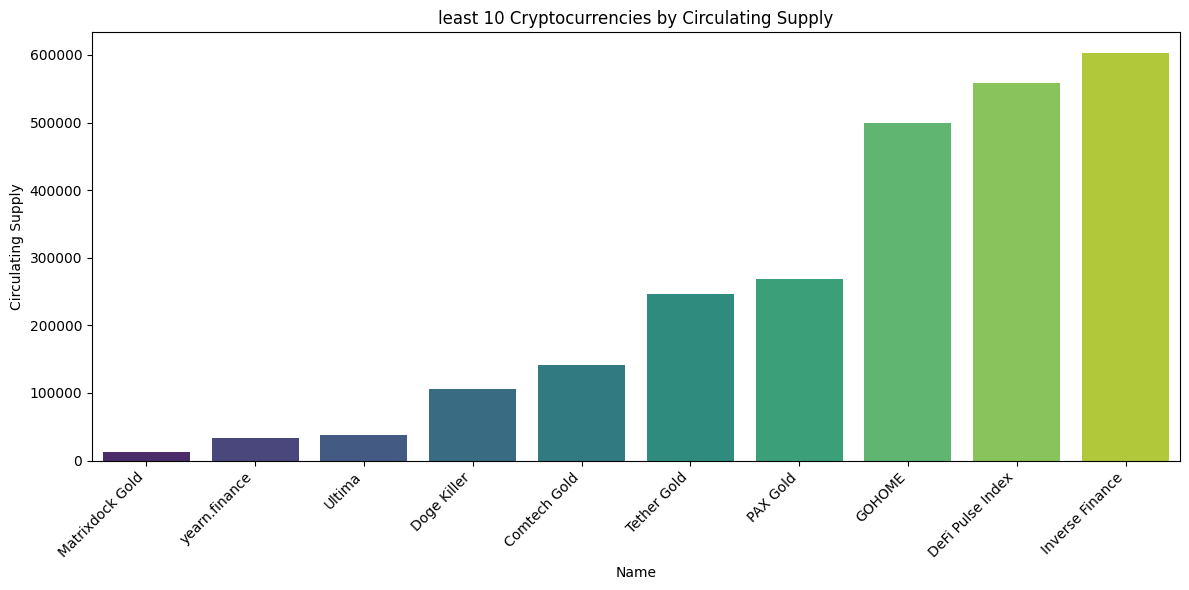

In [ ]:
      # Sort and get top 10 cryptos by Circulating Supply
top_supply = df.sort_values(by='Circulating Supply', ascending=True).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_supply, x='Name', y='Circulating Supply',hue = "Name",palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("least 10 Cryptocurrencies by Circulating Supply")
plt.tight_layout()
plt.show()


here we observed according to Total Supply and Circulating Supply Tether USDt is most Total Supply and Circulating Supply. .

according to Total Supply and Circulating Supply Matrixdock Gold is least Total Supply and Circulating Supply.

The Reason Total Supply and Circulating Supply is show us only single value is

because this two Total Supply and Circulating Supply are highly co-related and most of the Reduntant.

for modeling only use one of the column b/w then.

Text(0.5, 1.0, 'Volatility Comparison Across Timeframes')

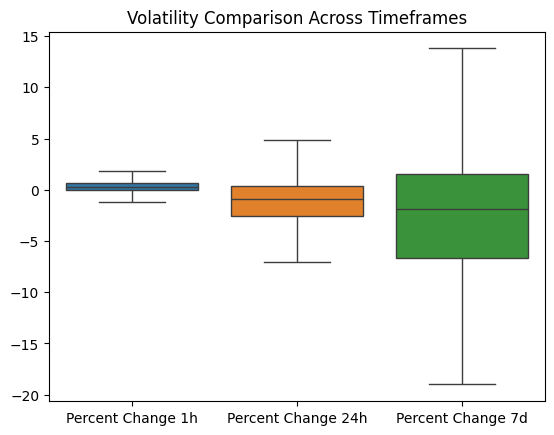

In [ ]:
sns.boxplot(data=df[['Percent Change 1h', 'Percent Change 24h', 'Percent Change 7d']])
plt.title("Volatility Comparison Across Timeframes")

he boxplot  way to compare the distribution and spread of price changes across 1 hour, 24 hours, and 7 day

The 1-hour box is very small, with its median very close to zero. Most prices hardly change within any given hour.

The median of the 24-hour change sits a bit above zero, suggesting that more prices tend to gain than lose on a daily basis.

The 7-day box is the tallest, meaning the middle 50% of prices change more over a week than over a day or an hour

In [ ]:
df['Hype Score'] = df['Volume (24h, USD)'] / df['Market Cap (USD)']
df.sort_values(by='Hype Score', ascending=False).head(10)

,Name,Symbol,Price (USD),Market Cap (USD),"Volume (24h, USD)",Percent Change 1h,Percent Change 24h,Percent Change 7d,Circulating Supply,Total Supply,...,Rank,Last Updated,trend_consistency,Percent Change 1h_gain,Percent Change 1h_loss,Percent Change 24h_gain,Percent Change 24h_loss,Percent Change 7d_gain,Percent Change 7d_loss,Hype Score
999,StormX,STMX,0.00097338,12022871.96521304,35905220.91496198,1.81689419,-7.03974825,-19.00295146,5268233908.75000000,12500000000.00000000,...,1000,2025-06-26T08:01:00.000Z,Mixed data,1.81689419,0.00000000,0.00000000,7.03974825,0.00000000,19.00295146,2.98640965
923,Janitor,JANITOR,0.01467887,14678870.76038304,40506324.05091046,-1.15249115,4.82300864,4.04624635,1000000000.00000000,1000000000.00000000,...,924,2025-06-26T08:01:00.000Z,Mixed data,0.00000000,1.15249115,4.82300864,0.00000000,4.04624635,0.00000000,2.75949865
934,Hifi Finance,HIFI,0.10114900,14344541.76214995,36237901.20058621,-0.82905814,-7.03974825,13.78933473,141815946.24911302,166815946.24911302,...,935,2025-06-26T08:01:00.000Z,Mixed data,0.00000000,0.82905814,0.00000000,7.03974825,13.78933473,0.00000000,2.52625018
897,Biswap,BSW,0.02424922,16068382.39210266,40506324.05091046,1.81689419,4.82300864,9.62639368,662634945.00000000,646907215.69513416,...,898,2025-06-26T08:01:00.000Z,Price increasing,1.81689419,0.00000000,4.82300864,0.00000000,9.62639368,0.00000000,2.52087130
889,CUDIS,CUDIS,0.06551520,16215013.12549887,40506324.05091046,-0.28950110,-2.01093301,-12.49517170,247500000.00000000,1000000000.00000000,...,890,2025-06-26T08:00:00.000Z,Price decreasing,0.00000000,0.28950110,0.00000000,2.01093301,0.00000000,12.49517170,2.49807532
873,Bedrock,BR,0.07963581,16723520.42554733,40506324.05091046,-0.02505372,0.01317342,13.78933473,210000000.00000000,1000000000.00000000,...,874,2025-06-26T08:00:00.000Z,Mixed data,0.00000000,0.02505372,0.01317342,0.00000000,13.78933473,0.00000000,2.42211706
883,Stella,ALPHA,0.01746847,16333017.66322900,38779803.74412515,1.81689419,-7.03974825,-14.69547683,935000000.00000000,1000000000.00000000,...,884,2025-06-26T08:01:00.000Z,Mixed data,1.81689419,0.00000000,0.00000000,7.03974825,0.00000000,14.69547683,2.37431959
799,Bulla,BULLA,0.07150159,20020444.94107947,40506324.05091046,-0.31665582,4.82300864,-11.62488273,280000000.00000000,1000000000.00000000,...,800,2025-06-26T08:01:00.000Z,Mixed data,0.00000000,0.31665582,4.82300864,0.00000000,0.00000000,11.62488273,2.02324794
791,Open Loot,OL,0.03200382,20215078.73387314,40506324.05091046,-0.47188749,0.16991378,-3.79472630,631645832.97060001,5000000000.00000000,...,792,2025-06-26T08:01:00.000Z,Mixed data,0.00000000,0.47188749,0.16991378,0.00000000,0.00000000,3.79472630,2.00376781
717,Resolv,RESOLV,0.16218200,25259846.02646500,40506324.05091046,-1.15249115,-4.94860660,-19.00295146,155750000.00000000,1000000000.00000000,...,718,2025-06-26T08:00:00.000Z,Price decreasing,0.00000000,1.15249115,0.00000000,4.94860660,0.00000000,19.00295146,1.60358555


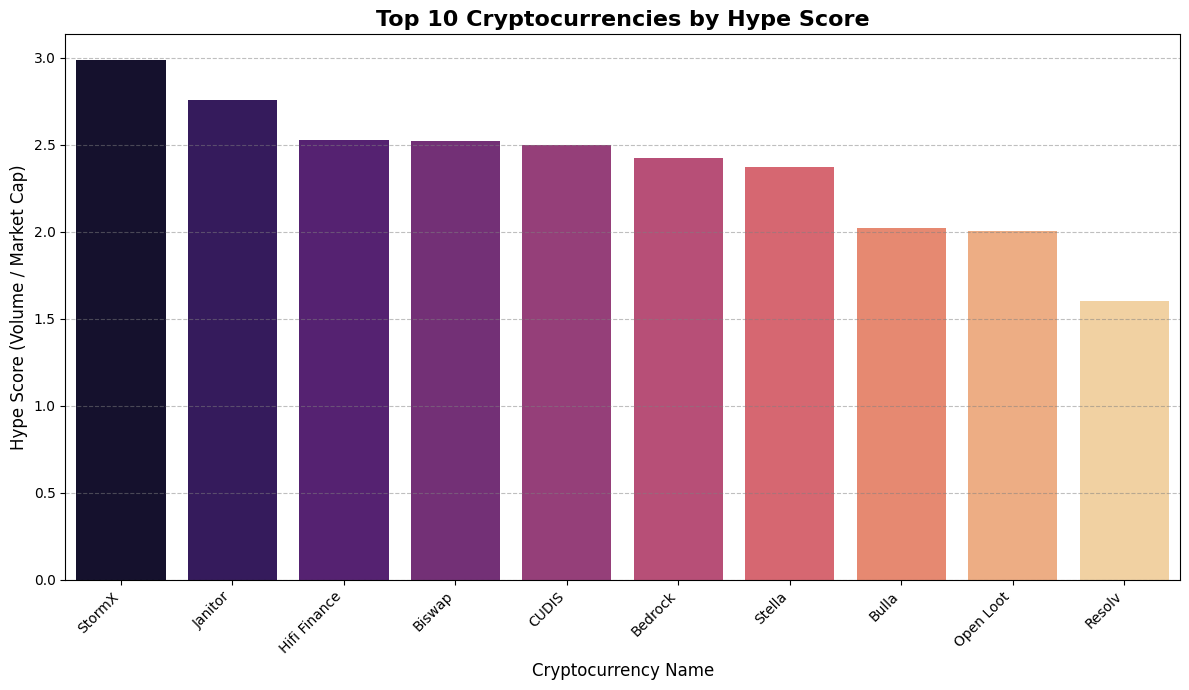

In [ ]:
df['Hype Score'] = df['Volume (24h, USD)'] / df['Market Cap (USD)']
df.sort_values(by='Hype Score', ascending=False).head(10)
# Sort the DataFrame by Hype Score in descending order and select the top 10
top_hype_score = df.sort_values(by='Hype Score', ascending=False).head(10)

# Create a bar plot of the top 10 cryptocurrencies by Hype Score
plt.figure(figsize=(12, 7))
sns.barplot(data=top_hype_score, x='Name', y='Hype Score', hue='Name', palette='magma')
plt.title('Top 10 Cryptocurrencies by Hype Score', fontsize=16, fontweight='bold')
plt.xlabel('Cryptocurrency Name', fontsize=12)
plt.ylabel('Hype Score (Volume / Market Cap)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', which='major', color='gray', alpha=0.5)
plt.tight_layout()
plt.show()

StormX has the highest Hype Score (~3.0).

That means its 24h trading volume is 3x its market cap, indicating extremely high trading activity relative to its size.

This suggests intense market interest, buzz, or speculation, even if its market cap may be relatively low.

Janitor, Gold Finance, Diswap These coins also have Hype Scores between 2.5 and 2.8.

They are seeing massive trade volume relative to their market cap,
suggesting:

Short-term momentum

Potential for quick price movements

Coins like Resolv and Open Loot are at the bottom of the top 10, with scores between 1.6 and 2.0.

Still active, but much less speculative compared to the top ones.

These might be more stable or less hyped — possibly undervalued or less volatile.

# **MultiVarainte Analysis**

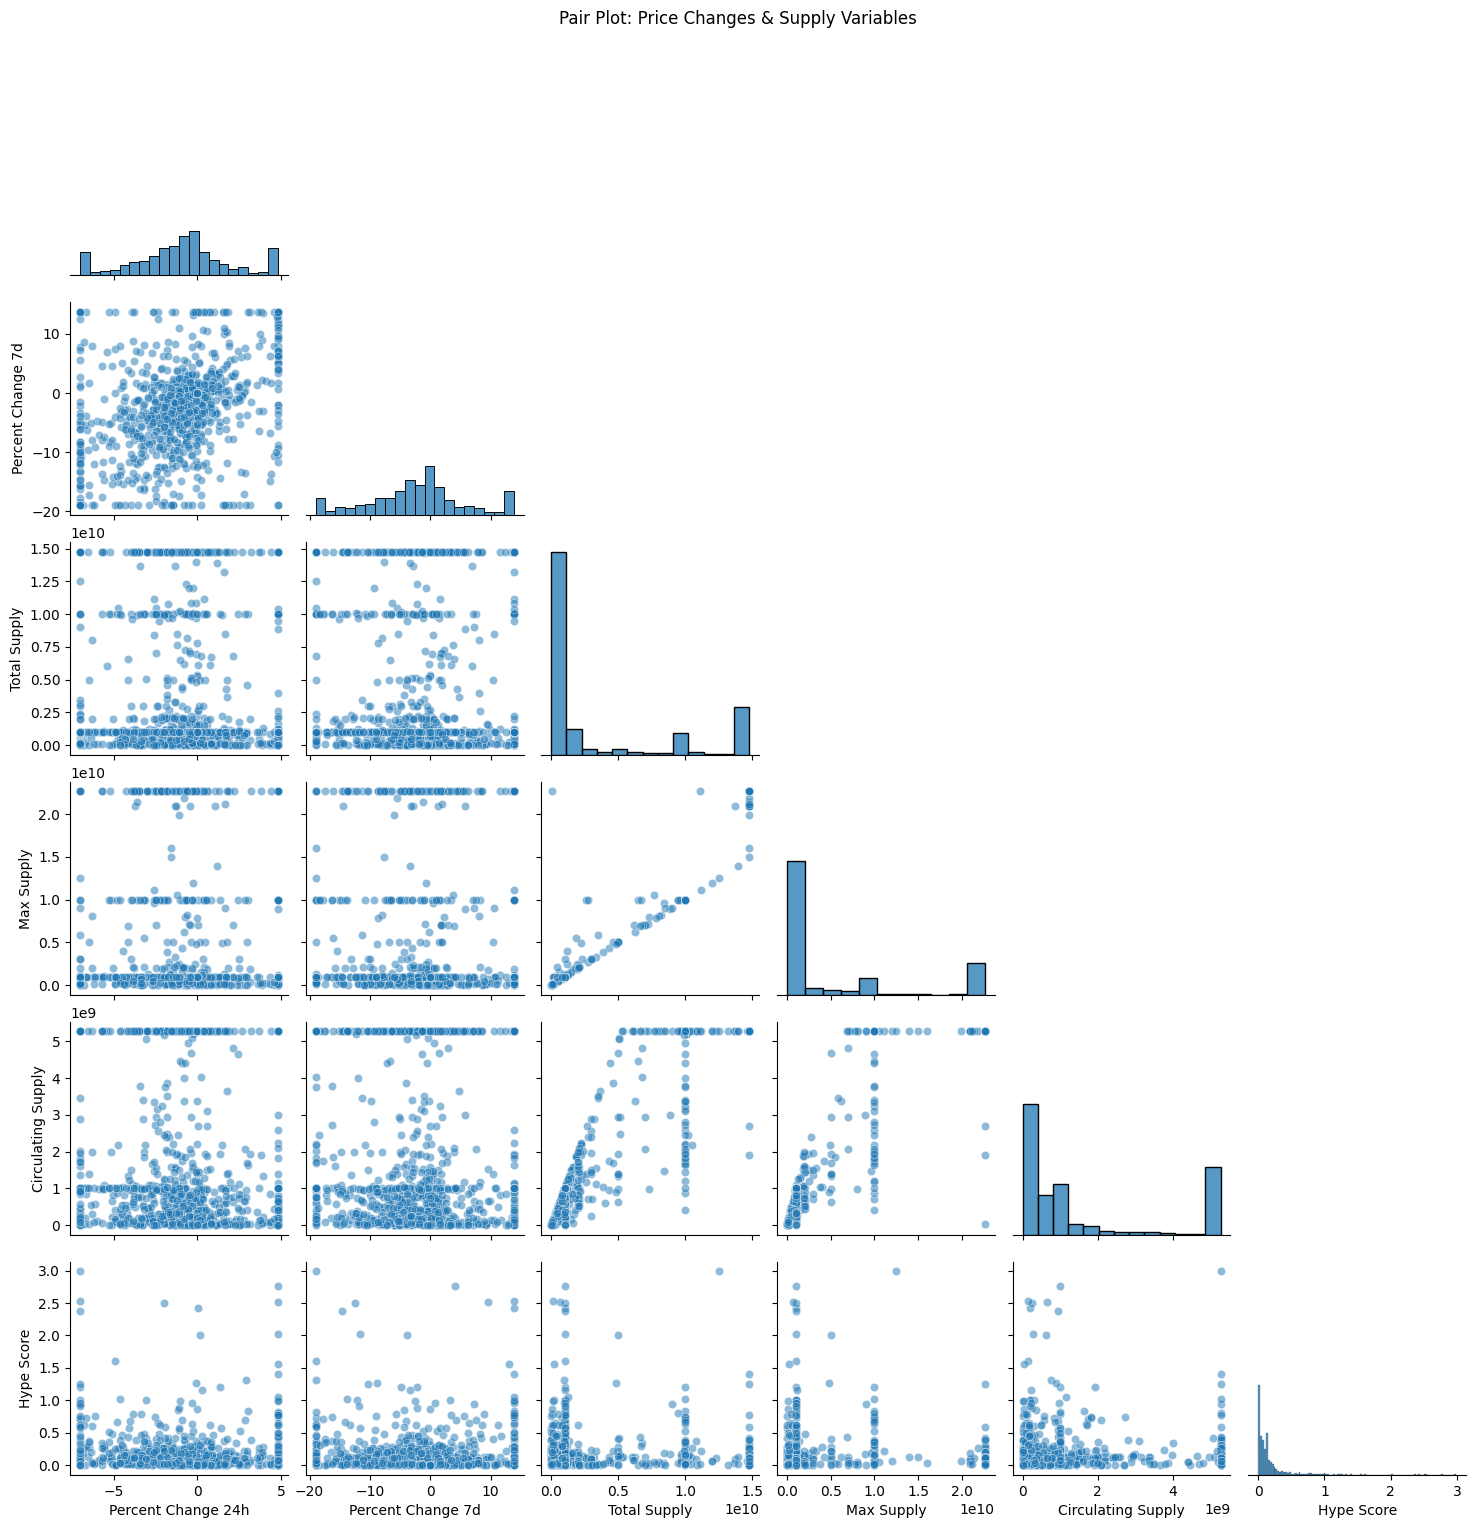

In [ ]:
columns_to_plot = ['Percent Change 24h', 'Percent Change 7d',
                   'Total Supply', 'Max Supply', 'Circulating Supply','Hype Score']

sns.pairplot(df[columns_to_plot], corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pair Plot: Price Changes & Supply Variables", y=1.02)
plt.show()

the pair plot highlights the skewed nature of supply data, confirms the relationship between 24h and 7d price changes, and

pair plot primarily concludes that the various supply figures like(Total supply, Max Supply and Circulating Supply) are highly redundant and do not show a strong simple linear connection to recent price percentage fluctuations.

# **Cryptocurrency  Data Analysis Report**

1.) **Data Overview and Cleaning:**
The dataset contains information on 1000 cryptocurrencies with 13 features, including price, market cap, volume, percentage changes over different timeframes, and supply metrics. The 'Max Supply' column was found to have a significant number of missing values (38.5%). Outliers in numerical columns were addressed by clipping the data to within 1.5 times the Interquartile Range (IQR)

**2. Univariate Analysis**:

Key Insights:

Over 500 investors preferred low-cost cryptos priced between $0.00 to $0.15.

As prices increased, the number of investors dropped, reflecting risk aversion.

Around 40 to 50 investors participated in cryptos priced $0.90 to $1.00.

Over 100 investors invested in the high range of $1.51 to $1.75.

KDE (Distribution) Observations:

Most KDE plots are right-skewed:

Most values are concentrated at lower ends.

Mean is greater than the median.

The 'Rank' column showed a symmetrical bell curve.

Some percentage change columns like 24h and 7d were left-skewed.

Summary: Most people invest in low-risk, low-priced cryptos. A few investors take risks on high-priced coins. The distribution is skewed, so medians are more representative than means


**3. Bivariate Analysis:**

**Top Cryptocurrencies by Market Cap:**

here Bitcoin, Ethereum, XRP, BNB, Solana these are crypto currencies price over range above more than 1.6$ dollars

next one is  Tether USDt has price 1.00$ dollars

after we got Cardano around 0.55 dollars and then wegot Tron  we  got around 0.25$  and Dogecoin  is  price  around  0.15$

**Bar graph to show percentage increase or decrease with 1hour, 24hours and 7 days: **

Top 10 crypto decreases the percentage money in 1hour, 24hours and 7 days using Bar graph

Top 10 crypto increase the percentage money in 1hour, 24hours and 7 days using Bar graph

**Coorelations of Percentage changes:**

There is a very weak positive linear relationship between 'Percent Change 1h' and both 'Percent Change 24h' (0.067) and 'Percent Change 7d' (0.069).

This implies that short-term (1-hour) price movements are not strong predictors of slightly longer-term trends.

A moderate positive linear relationship exists between 'Percent Change 24h' and 'Percent Change 7d' (0.439).

Most of the data points are clustered around 0 at both axis, meaning small changes are occured.

Overall, 24hours change gives a small hint about what might happen in 7days, but it’s not super reliable on its own.

**Supply Variable Correlations:**

'Circulating Supply', 'Total Supply', and 'Max Supply' are highly positively correlated with each other (correlation coefficients ranging from 0.91 to 0.97).
This strong interrelationship suggests potential multicollinearity if all three variables were used simultaneously in a linear model.

Percentage Change vs. Supply: Scatter plots and correlation analysis indicate weak or no strong linear relationships between the percentage change variables and the supply variables.

**. Trend Consistency:**

The analysis of trend consistency across 1h, 24h, and 7d percentage changes revealed that the majority of cryptocurrencies (71.9%) exhibited mixed trends (some positive, some negative changes across the timeframes)

A smaller proportion showed consistent decreasing (15.7%) or
increasing (12.4%) trends.

**5. Key Cryptocurrencies:**

Most Invested (by Market Cap): Bitcoin (BTC) had the highest market capitalization.
Least Invested (by Market Cap): FIO Protocol (FIO) had the lowest market capitalization in this dataset.

Highest Circulating/Total Supply: Tether USDt (USDT) was found to have the highest circulating and total supply (after outlier handling).

Lowest Circulating/Total Supply: Matrixdock Gold (XAUM) was found to have the lowest circulating and total supply (after outlier handling).

the Reason Total Supply and Circulating Supply is show us only single value is
because this two Total Supply and Circulating Supply are highly co-related and most of the Reduntant.

**MultiVarainte Analysis**

the pair plot highlights the skewed nature of supply data, confirms the relationship between 24h and 7d price changes, and

pair plot primarily concludes that the various supply figures like(Total supply, Max Supply and Circulating Supply) are highly redundant and do not show a strong simple linear connection to recent price percentage fluctuations.


conclusions:

The analysis revealed significant skewness in price and supply distributions, moderate correlation between 24-hour and 7-day price changes (but weak correlation with 1-hour changes), and strong correlations among supply metrics.

The majority of cryptocurrencies show mixed price trends over short to medium timeframes, highlighting market volatility.

While market leaders like Bitcoin and Ethereum maintain high market caps and often higher prices, the lower end of the market is characterized by a large number of low-priced coins and highly varied supply figures.